# Data Training OASIS 2

The following classification models will be employed to analyse and classify the OASIS 2 dataset. These models have been selected for their distinct characteristics and their ability to capture various patterns within the data:

1. Logistic Regression
2. Ridge Classifier
3. Decision Tree Classifier
4. Extra Trees Classifier
5. Random Forest Classifier
6. Support Vector Machine (SVM)
7. Multi-Layer Perceptron (MLP)
8. Probabilistic Neural Network (PNN)
9. LightGBM Classifier (LGBM)
10. Gradient Boosting Classifier
11. AdaBoost Classifier
12. Gaussian Naive Bayes (GNB)
13. K-Nearest Neighbours (KNN)
14. Voting Classifier
15. TabNet

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)

from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

import tensorflow as tf
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier

### Data cleaning and preprocessing
The dataset underwent several preprocessing steps to ensure its quality and completeness. Initially, missing values in the "SES" (Socioeconomic Status) column were imputed using the median, a method that preserves the central tendency of the data while addressing the issue of missingness. Similarly, missing values in the "MMSE" (Mini-Mental State Examination) column were replaced with the mean, a standard technique for handling missing numerical data.

The "Group" column, which categorised participants as "Demented", "Nondemented", or "Converted", was mapped to binary values: "Demented" and "Converted" were assigned a value of 1, while "Nondemented" was assigned a value of 0. This transformation simplified the group representation for statistical modelling and classification purposes. Finally, the "M/F" (Gender) column, containing string values ("F" for female and "M" for male), was encoded numerically, with 0 representing female and 1 representing male.

In [2]:
data = pd.read_csv("./OASIS 2/oasis_longitudinal_demographics.csv")

data["SES"] = data["SES"].fillna(data["SES"].median())
data["MMSE"] = data["MMSE"].fillna(data["MMSE"].mean())

group_map = {"Demented": 1, "Nondemented": 0, "Converted": 1} 
gender_map = {"F": 0, "M": 1}

data["Group"] = data["Group"].map(group_map)
data["M/F"] = data["M/F"].map(gender_map)

### Feature selection and dataset splitting
After preprocessing, the dataset was prepared for model training by selecting relevant features and splitting the data into training and testing sets. The feature columns included Gender, Age, Education Level, Socioeconomic Status, Mini-Mental State Examination, Estimated Total Intracranial Volume, Normalized Whole Brain Volume and Atlas Scaling Factor. The target column, representing the outcome variable, was "Group", which indicated the dementia status of the participants.

The dataset was then divided into input features and target variable. To assess the model’s performance, the data was split into training and testing subsets, with 30% of the data reserved for testing. The split was stratified based on the target variable to ensure the distribution of classes in both the training and testing sets was balanced. A random seed was set to 42 to ensure reproducibility of the results.

In [3]:
feature_cols = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
target_col = "Group"

X = data[feature_cols]
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

### Feature Transformation
We ensure that both numerical and categorical features are properly prepared for model training. Numerical data is preserved as-is, while categorical variables are converted into a machine-readable format. This transformation ensures compatibility with the model and improves its ability to learn meaningful patterns from the data. By addressing the specific requirements of each feature type, the process enhances the overall effectiveness and reliability of the model.

In [4]:
numeric_features = ["Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
categorical_features = ["M/F"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

### Model Accuracy Evaluation in Machine Learning Pipelines
This establishes a systematic approach to evaluate the effectiveness of multiple machine learning models. The logic behind this implementation lies in comparing the predictive capabilities of various algorithms on the same dataset. This process ensures that the selection of a final model is based on empirical evidence rather than assumptions or biases.

In [5]:
evaluation_metrics = ["Precision", "Recall", "F1-score"]

total_models = [
    "LogisticRegression",
    "RidgeClassifier",
    "DecisionTreeClassifier",
    "ExtraTreesClassifier",
    "RandomForestClassifier",
    "SVC",
    "MLPClassifier",
    "ProbabilisticNeuralNetwork",
    "LGBMClassifier",
    "GradientBoostingClassifier",
    "AdaBoostClassifier",
    "GaussianNB",
    "KNeighborsClassifier",
    "VotingClassifier",
    "TabNet"
]

cont = 0


total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
    

## Logistic Regression Classification
A Logistic Regression is a statistical model used for binary classification tasks. It estimates the probability of a given input belonging to a particular class by modelling the relationship between the input features and the target variable using a logistic function, also known as the sigmoid function.

### Pipeline for preprocessing and model training
A pipeline was created to streamline the process of data preprocessing and model training. The preprocessing steps ensure that the data is appropriately transformed before being fed into the logistic regression classifier.

In [6]:
pipeline_logistic = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42, max_iter=5000))
    ]
)

In [7]:
pipeline_logistic.fit(X_train, y_train)

y_pred_logistic = pipeline_logistic.predict(X_test)

### Model Evaluation
The performance of the model was assessed using two primary metrics: the Confusion Matrix and the Receiver Operating Characteristic (ROC) curve

- **Confusion Matrix**: The confusion matrix was employed to assess the accuracy of the classification by juxtaposing the predicted labels with the actual labels. This matrix presents the frequency of correct and incorrect predictions, with the rows corresponding to the true labels ("Nondemented" and "Demented") and the columns representing the predicted labels. The matrix shows that the Logistic Regression model correctly identified 50 "Nondemented" and 35 "Demented" instances. However, it misclassified 7 "Nondemented" as "Demented" and 20 "Demented" as "Nondemented." These misclassifications, especially the 20 "Demented" instances wrongly predicted as "Nondemented," highlight a difficulty in distinguishing between the two classes. The high number of false negatives for "Demented" suggests that the model could be improved, possibly by adjusting the decision threshold or using more advanced classification methods.

- **ROC Curve**: The ROC curve was plotted to examine the model's discriminatory capacity across different classification thresholds. This curve illustrates the trade-off between the False Positive Rate (FPR) and the True Positive Rate (TPR), with an optimal model achieving a high TPR and a low FPR. The Area Under the Curve (AUC) for the Logistic Regression model was found to be 0.877, which reflects a strong discriminatory ability. An AUC score approaching 1 is indicative of a model with high sensitivity and specificity, which suggests that the model is generally proficient in distinguishing between the two classes.

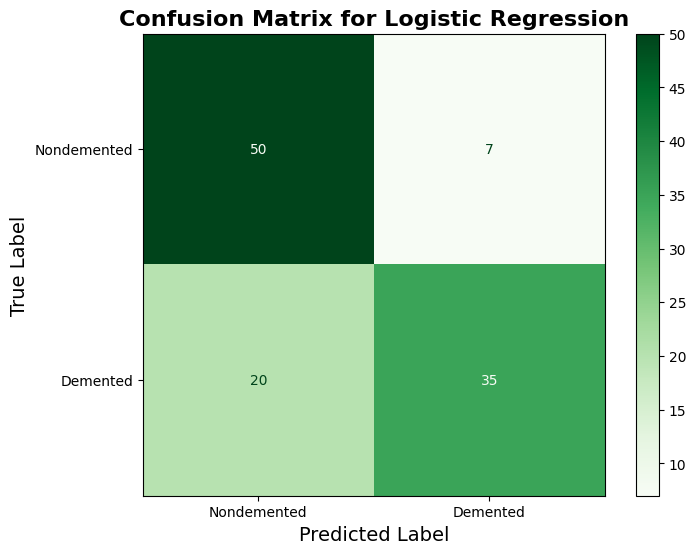

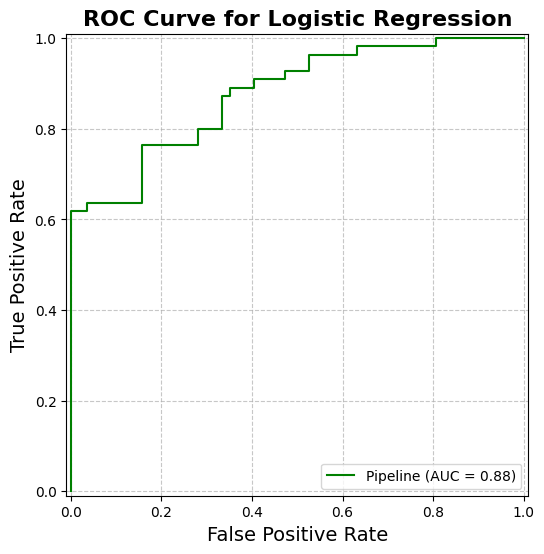

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    pipeline_logistic,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Greens",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for Logistic Regression", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(pipeline_logistic, X_test, y_test, ax=ax, color="green")
ax.set_title("ROC Curve for Logistic Regression", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
The model's performance was evaluated using precision, recall, and F1-score for the "Nondemented" and "Demented" classes:
- Nondemented Class: The model achieved 76% precision, 84% recall, and an F1-score of 80%, indicating stronger performance in identifying true negatives.
- Demented Class: Precision was higher at 82%, but recall lagged at 73%, resulting in an F1-score of 77%. This suggests challenges in detecting true positives for this class.

Overall, the model achieved 78.6% accuracy with balanced macro and weighted averages around 78.5%. However, it struggles with misclassifying "Demented" instances as "Nondemented," which is critical in diagnostic contexts.

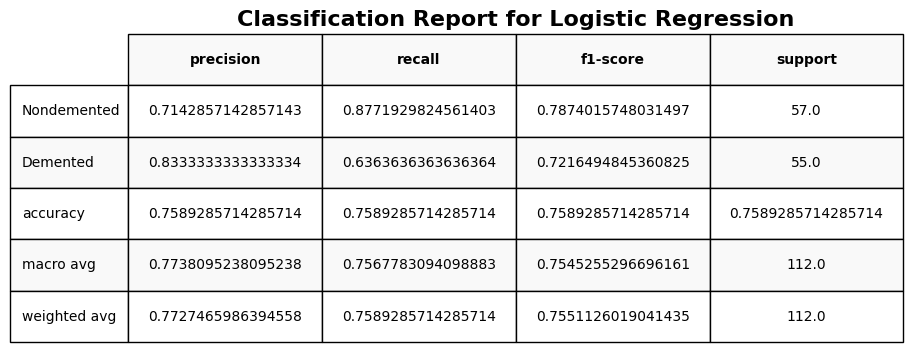

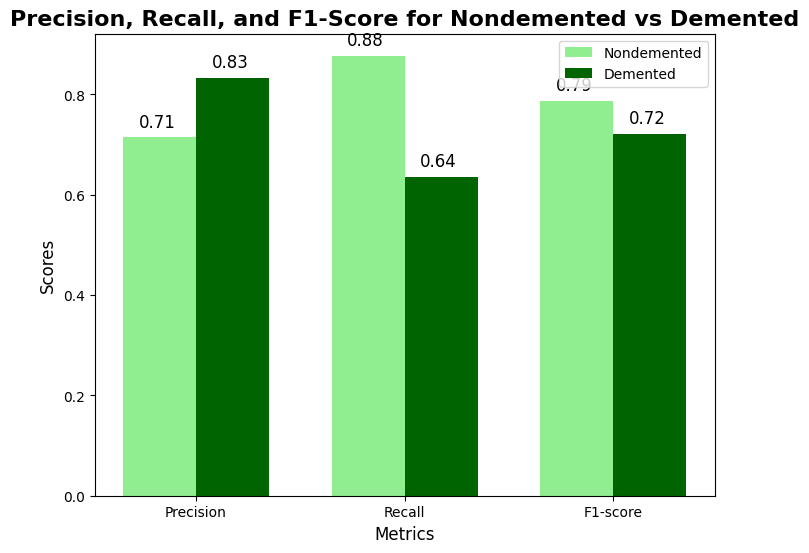

In [9]:
report = classification_report(
    y_test, y_pred_logistic, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1],
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title(
    "Classification Report for Logistic Regression", fontsize=16, fontweight="bold"
)
plt.show()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"],
]
demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"],
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index, nondemented_scores, bar_width, label="Nondemented", color="lightgreen"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="darkgreen",
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold",
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

-----------
## Ridge Classification
A Ridge Classifier is a supervised learning technique that extends linear regression by incorporating L2 regularisation. The RidgeClassifier aims to solve classification problems by fitting a linear model to the data while penalising large coefficients to avoid overfitting. The penalty term encourages smaller values for the model's coefficients, promoting a simpler, more generalisable model.

In [10]:
pipeline_ridge = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            RidgeClassifier()
        )
    ]
)

In [11]:
param_dist_ridge = {
    "classifier__alpha": [
        0.01,
        0.1,
        1,
        10,
        100
    ],  
    "classifier__solver": ["auto", "saga", "lsqr"]
}

search_ridge = RandomizedSearchCV(
    pipeline_ridge,
    param_distributions=param_dist_ridge,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_ridge.fit(X_train, y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 15 is smaller than n_iter=50. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              RidgeClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__alpha': [0.01, 0.1, 1, 10,
                                                              100],
                                        'classifier__solver': ['auto', 'saga',
                                                               'lsqr']},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model successfully classified 51 instances of "Nondemented" and 36 instances of "Demented". However, it misclassified 6 "Nondemented" instances as "Demented" and 19 "Demented" instances as "Nondemented".

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.87, reflecting strong discriminatory ability. While this score signifies that the model is effective at distinguishing between the "Nondemented" and "Demented" categories.

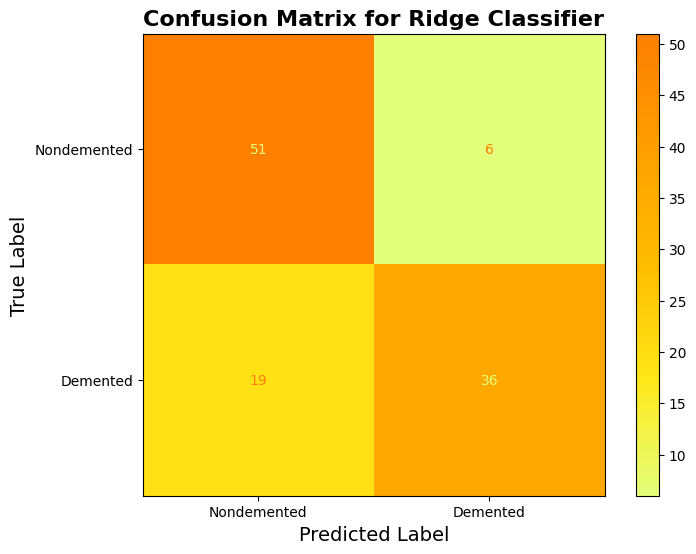

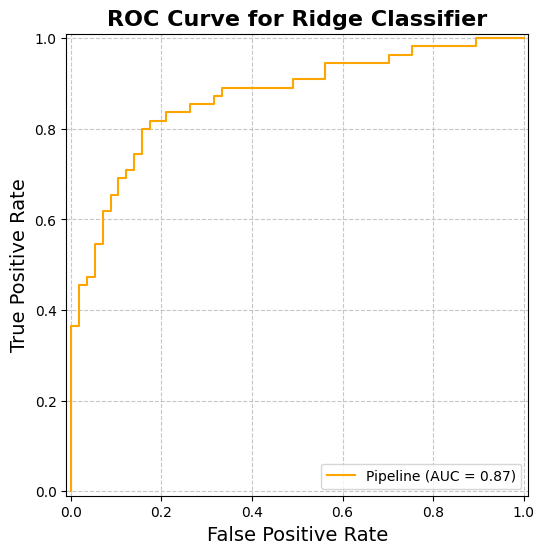

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_ridge.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Wistia",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for Ridge Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_ridge.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="orange"
)
ax.set_title("ROC Curve for Ridge Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 73% precision, 89% recall, and an F1-score of 80%. These results indicate strong performance in correctly identifying true negatives, as reflected by the high recall.
- Demented Class: Precision for this class was higher at 86%, demonstrating the model’s ability to correctly identify true positives. However, recall was comparatively lower at 65%, resulting in an F1-score of 74%. This imbalance suggests challenges in recognising all instances of "Demented".

Overall, the model achieved an accuracy of 78%, with macro and weighted averages for precision, recall, and F1-score hovering around 77–79%. While the results indicate a reasonable level of overall performance, the lower recall for the "Demented" class highlights a critical area for improvement.

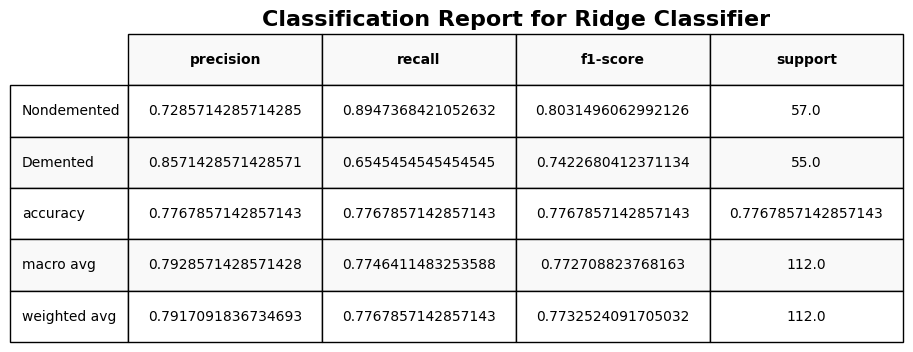

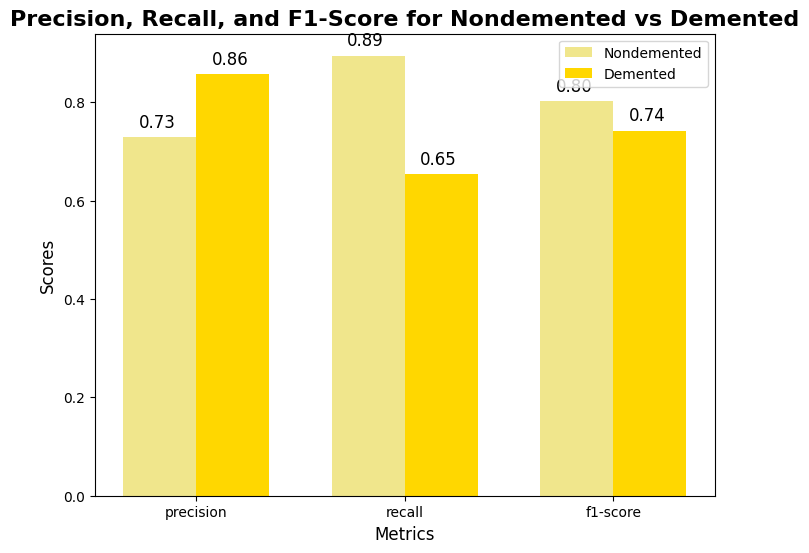

In [13]:
y_pred = search_ridge.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for Ridge Classifier", fontsize=16, fontweight="bold")
plt.show()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(["precision", "recall", "f1-score"]))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="khaki"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="gold"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(["precision", "recall", "f1-score"])
ax.legend()
plt.show()

-----------
## Decision Tree Classification
A DecisionTreeClassifier is a supervised learning model that splits data into subsets based on feature values. Each internal node represents a decision based on a feature, and each leaf node corresponds to a class label. The model recursively divides the data to minimise impurity, making it capable of capturing complex patterns.

In [14]:
pipeline_decision_tree = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ]
)

In [15]:
param_dist_decision_tree = {
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"],
    "classifier__criterion": ["gini", "entropy"]
}

search_decision_tree = RandomizedSearchCV(
    pipeline_decision_tree,
    param_distributions=param_dist_decision_tree,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_decision_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model correctly classified 42 instances of "Nondemented" and 34 instances of "Demented." However, it misclassified 15 "Nondemented" instances as "Demented" and 21 "Demented" instances as "Nondemented." These misclassifications suggest that the model struggles with correctly distinguishing between the two classes, particularly when it comes to differentiating between the "Nondemented" category and the "Demented" category. The higher number of misclassifications for the "Demented" class indicates a potential bias towards predicting "Nondemented," which may reflect an issue in the model's ability to generalise or its sensitivity to class imbalances. 

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) ROC score of 0.7732, which indicates a reasonably good performance in distinguishing between the "Nondemented" and "Demented" categories. An AUC score of 0.7732 suggests that the model is fairly effective in ranking positive instances higher than negative ones.

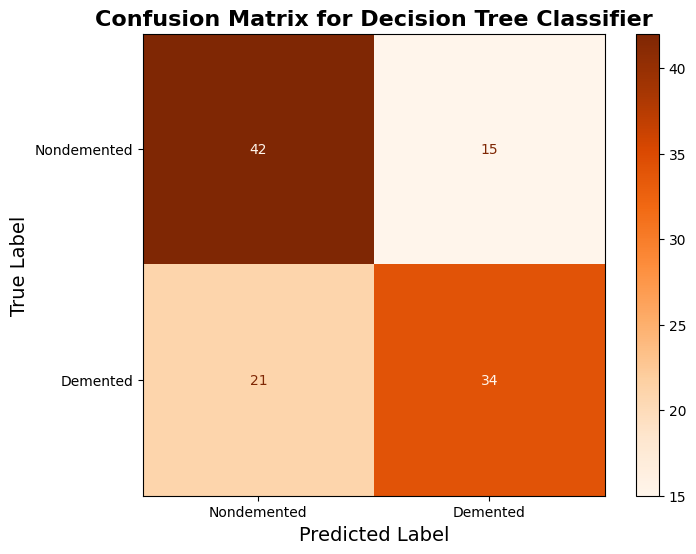

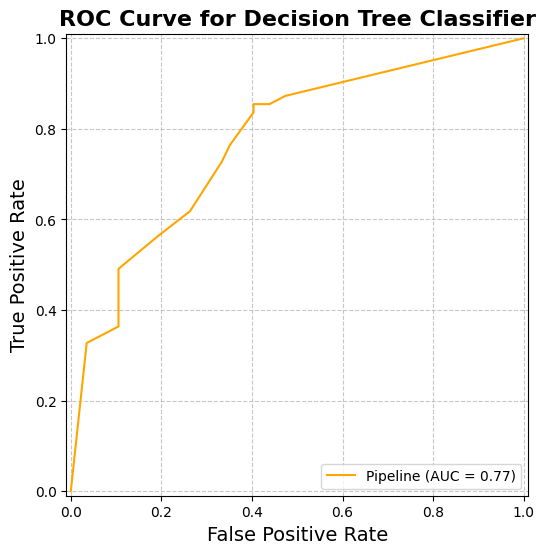

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_decision_tree.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Oranges",
    ax=ax,
    colorbar=True
)
ax.set_title(
    "Confusion Matrix for Decision Tree Classifier", fontsize=16, fontweight="bold"
)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_decision_tree.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="orange"
)
ax.set_title("ROC Curve for Decision Tree Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 66.67% precision, 73.68% recall, and a 70.00% F1-score. These results indicate a moderate ability to correctly identify "Nondemented" instances.
- Demented Class: The model showed 69.39% precision, 61.82% recall, and a 65.38% F1-score. While it performs relatively better in precision, recall is lower, suggesting that the model struggles to correctly identify all "Demented" individuals.

The model’s accuracy stands at 67.86%, with balanced macro and weighted averages. While it performs reasonably well, it still struggles with misclassifying "Demented" individuals, which is crucial in diagnostic contexts

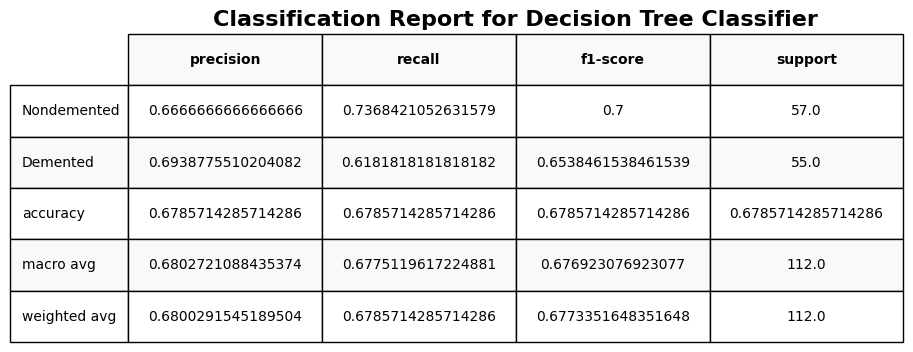

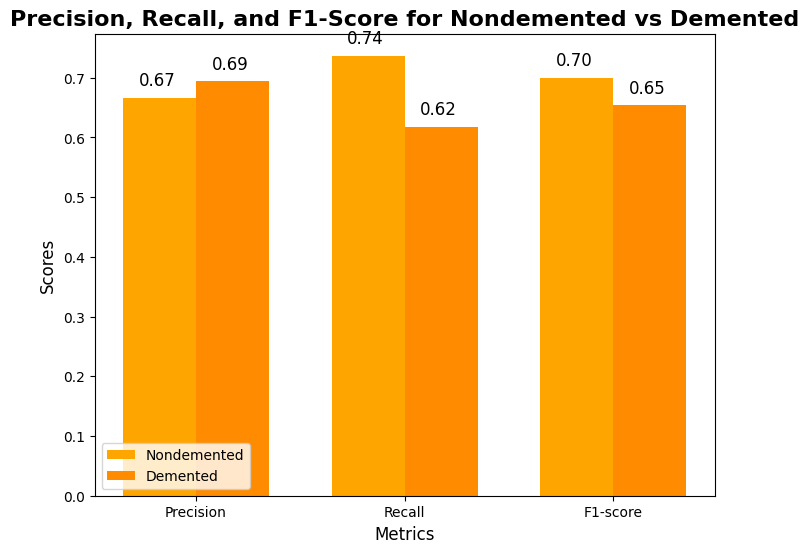

In [17]:
y_pred = search_decision_tree.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title(
    "Classification Report for Decision Tree Classifier", fontsize=16, fontweight="bold"
)
plt.show()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(index, nondemented_scores, bar_width, label="Nondemented", color="orange")

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="darkorange"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

--------------
## Extra Trees Classification
The ExtraTreesClassifier is an ensemble learning model that builds multiple decision trees and aggregates their predictions to improve accuracy and robustness. Unlike standard decision trees, Extra Trees introduce additional randomness by selecting a random subset of features for each split, leading to more diverse trees.

In [18]:
pipeline_extra_trees = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", ExtraTreesClassifier(random_state=42))
    ]
)

In [19]:
param_dist_extra_trees = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__bootstrap": [True, False]
}

search_extra_trees = RandomizedSearchCV(
    pipeline_extra_trees,
    param_distributions=param_dist_extra_trees,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_extra_trees.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              ExtraTreesClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__criterion': ['gini',
                                                                  'entropy'],
                                        'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model correctly identified 47 instances of "Nondemented" and 40 instances of "Demented". However, it misclassified 10 "Nondemented" instances as "Demented" and 15 "Demented" instances as "Nondemented". These misclassifications suggest that the model struggles to accurately distinguish between the two classes, especially in the case of "Demented", where it incorrectly classified a relatively high number of instances as "Nondemented".

- **ROC Curve**: The model attained an Area Under the Curve (AUC) score of 0.8912, which indicates that the model has good discriminatory power. An AUC of 0.8912 suggests that the model is able to effectively differentiate between the "Nondemented" and "Demented" classes.

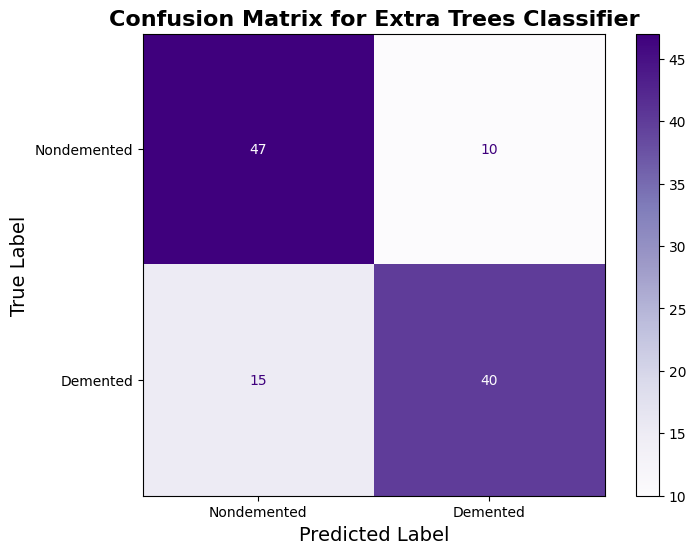

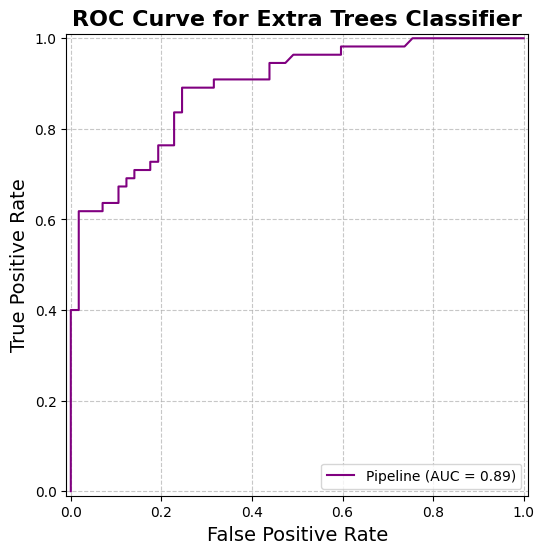

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_extra_trees.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Purples",
    ax=ax,
    colorbar=True
)
ax.set_title(
    "Confusion Matrix for Extra Trees Classifier",
    fontsize=16,
    fontweight="bold"
)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_extra_trees.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="purple"
)
ax.set_title(
    "ROC Curve for Extra Trees Classifier",
    fontsize=16,
    fontweight="bold"
)
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved a precision of 75.8%, recall of 82.5%, and an F1-score of 78.99%. This indicates that the model performs relatively well at identifying instances of "Nondemented," with a higher recall suggesting that it is better at detecting the true positives for this class.
- Demented Class: The model achieved a precision of 80.0%, recall of 72.7%, and an F1-score of 76.19%. The precision for "Demented" is better than recall, indicating that the model is more conservative in labeling "Demented" cases.

The model's accuracy is 77.7%, with balanced macro and weighted averages for precision, recall, and F1-score around 77.8%. While the model performs reasonably well on both classes, there are areas where it could be improved. Specifically, the model seems to have difficulty correctly classifying "Demented" instances, which could have serious implications in clinical settings.

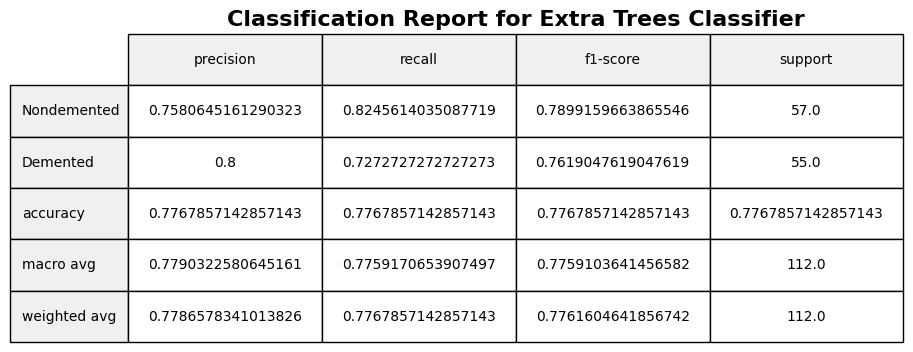

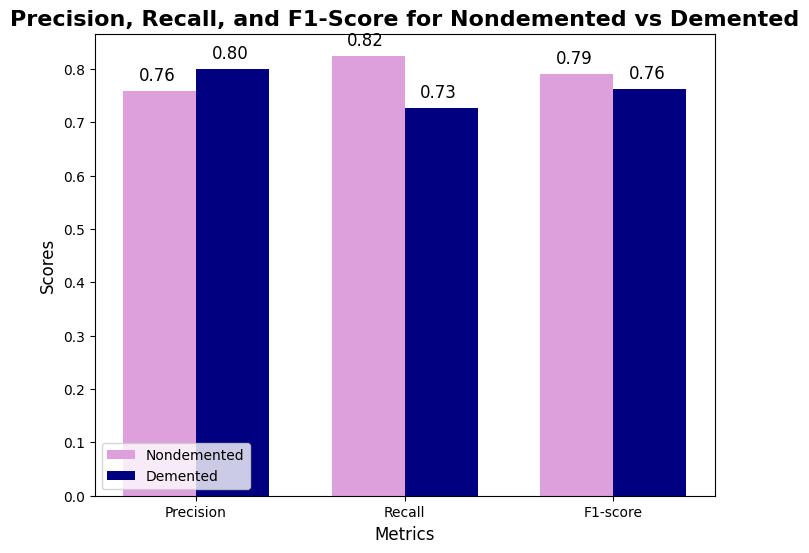

In [21]:
y_pred = search_extra_trees.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

plt.title(
    "Classification Report for Extra Trees Classifier",
    fontsize=16,
    fontweight="bold"
)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="plum"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="navy" 
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

----------
## Random Forest Classification
A RandomForestClassifier is an ensemble learning model that combines multiple decision trees to improve prediction accuracy. It trains each tree on a random subset of the data and considers a random subset of features at each node, promoting diversity among trees. The final prediction is made by aggregating the results of all trees, which helps reduce overfitting and increase robustness. 

In [22]:
pipeline_random_forest = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [23]:
param_dist_random_forest = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"]
}

search_random_forest = RandomizedSearchCV(
    pipeline_random_forest,
    param_distributions=param_dist_random_forest,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_random_forest.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__max_depth': [None, 10, 20,
                                                                  30],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model correctly identified 48 instances of "Nondemented" and 40 instances of "Demented". However, it also misclassified 9 "Nondemented" instances as "Demented" and 15 "Demented" instances as "Nondemented". These misclassifications reflect the model’s limitations and highlight areas for potential improvement, particularly in distinguishing between the two classes.

- **ROC Curve**: The model attained an Area Under the Curve (AUC) score of 0.85, suggesting robust overall performance. An AUC of this magnitude, nearing 1, denotes a high level of discriminatory power and indicates that the model is proficient at distinguishing between the "Nondemented" and "Demented" categories, although there remains some room for refinement in its predictive accuracy.

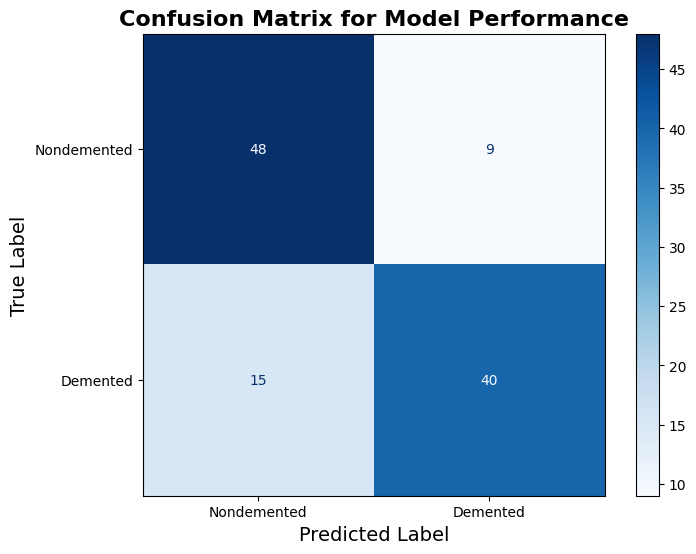

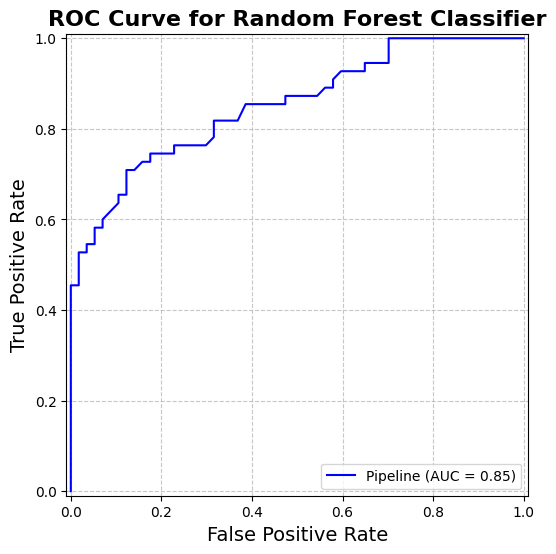

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_random_forest.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Blues",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for Model Performance", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_random_forest.best_estimator_, X_test, y_test, ax=ax, color="blue"
)
ax.set_title("ROC Curve for Random Forest Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 76% precision, 84% recall, and an F1-score of 80%, indicating stronger performance in identifying true negatives.
- Demented Class: Precision was higher at 82%, but recall lagged at 73%, resulting in an F1-score of 77%. This suggests challenges in detecting true positives for this class.

Overall, the model achieved 78.6% accuracy with balanced macro and weighted averages around 78.5%. However, it struggles with misclassifying "Demented" instances as "Nondemented," which is critical in diagnostic contexts.

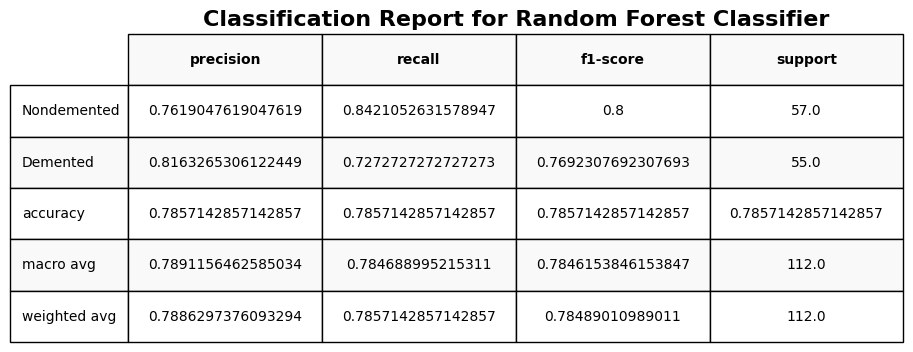

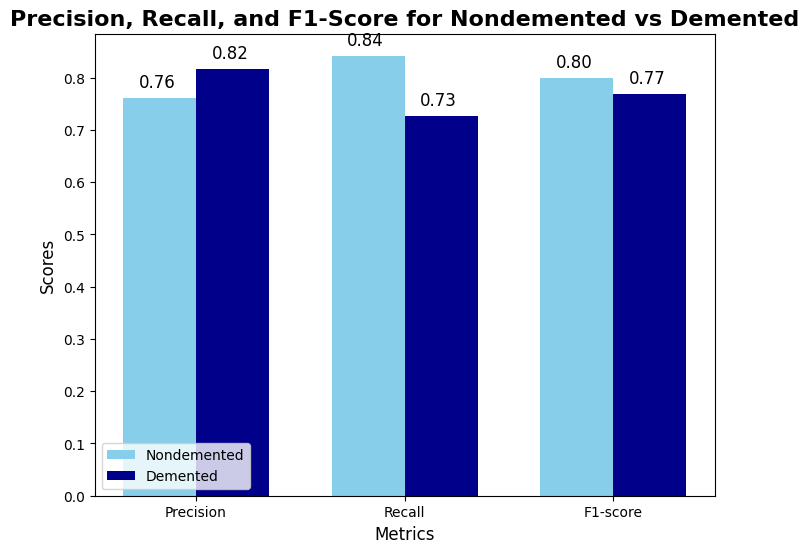

In [25]:
y_pred = search_random_forest.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0: 
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for Random Forest Classifier", fontsize=16, fontweight="bold")
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index, nondemented_scores, bar_width, label="Nondemented", color="skyblue"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="darkblue"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

----------
## Support Vector Machine (SVM) Classification
A SVM is a supervised learning model used for classification and regression tasks. It works by finding the optimal hyperplane that best separates data points of different classes in a high-dimensional space. The goal of SVM is to maximise the margin between the classes, ensuring the best possible generalisation to unseen data. SVM employs kernel functions to handle non-linear relationships, transforming data into higher dimensions where a linear separation becomes feasible.

In [26]:
pipeline_svm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(random_state=42))]
)

In [27]:
param_dist_svm = {
    "classifier__C": [1, 10],
    "classifier__kernel": ["linear", "rbf"],
    "classifier__gamma": ["scale"],
    "classifier__class_weight": [None]
}

search_svm = RandomizedSearchCV(
    pipeline_svm,
    param_distributions=param_dist_svm,
    n_iter=4,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_svm.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              SVC(random_state=42))]),
                   n_iter=4, n_jobs=-1,
                   param_distributions={'classifier__C': [1, 10],
                                        'classifier__class_weight': [None],
                                        'classifier__gamma': ['scale'],
                                        'classifier__kernel': ['linear',
                                                               'rbf']},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: he model successfully identified 52 instances of "Nondemented" and 35 instances of "Demented". However, it misclassified 5 "Nondemented" instances as "Demented" and 20 "Demented" instances as "Nondemented". The relatively higher number of false negatives for the "Demented" category suggests that the model may be less sensitive to this class, which is a critical issue to address for more accurate predictions.

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.88, which indicates strong overall performance. An AUC of this value, demonstrates substantial discriminatory power, suggesting that the model is effective at differentiating between the "Nondemented" and "Demented" groups.

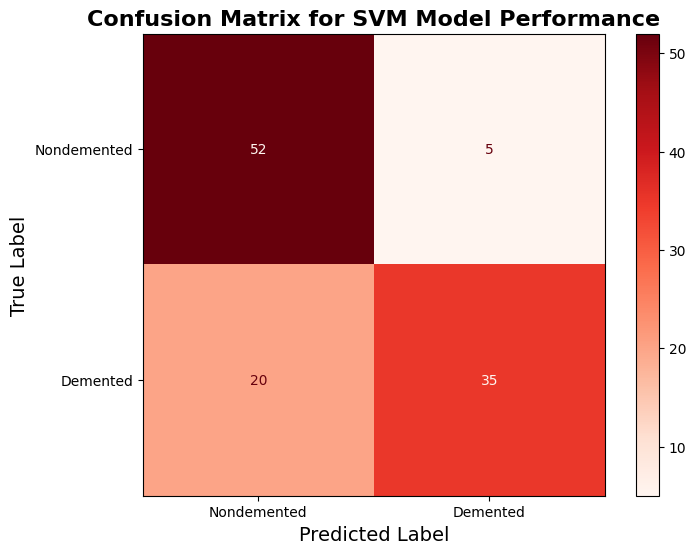

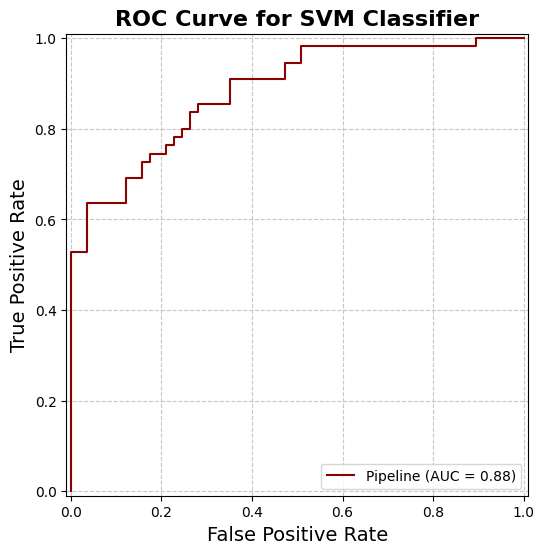

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_svm.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Reds",
    ax=ax,
    colorbar=True
)
ax.set_title(
    "Confusion Matrix for SVM Model Performance", fontsize=16, fontweight="bold"
)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_svm.best_estimator_, X_test, y_test, ax=ax, color="darkred"
)
ax.set_title("ROC Curve for SVM Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 72% precision, 91% recall, and an F1-score of 81%. This indicates a strong ability to identify the "Nondemented" instances, with high recall suggesting that the model is effective at detecting the majority of true negatives.
- Demented Class: The model achieved 88% precision, but recall was lower at 64%, resulting in an F1-score of 74%. While the high precision indicates that most of the "Demented" predictions are accurate, the lower recall suggests that the model is less effective at detecting all true "Demented" cases.

Overall, the model achieved 78% accuracy with a macro average of 77% and a weighted average of 77%. Nevertheless, he performance issues with the false positives for the "Demented" class are concerning.

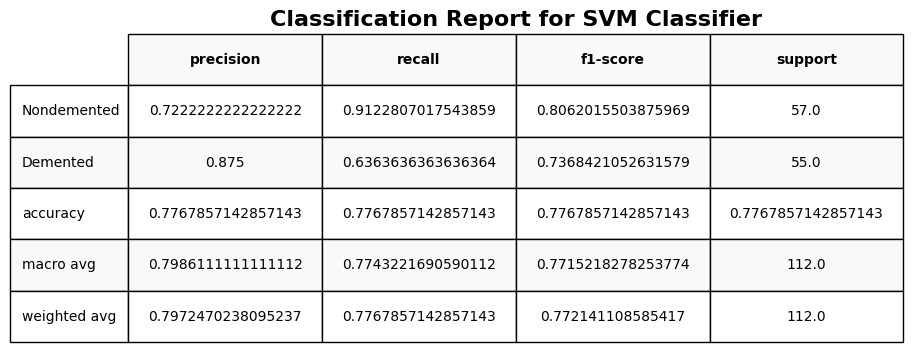

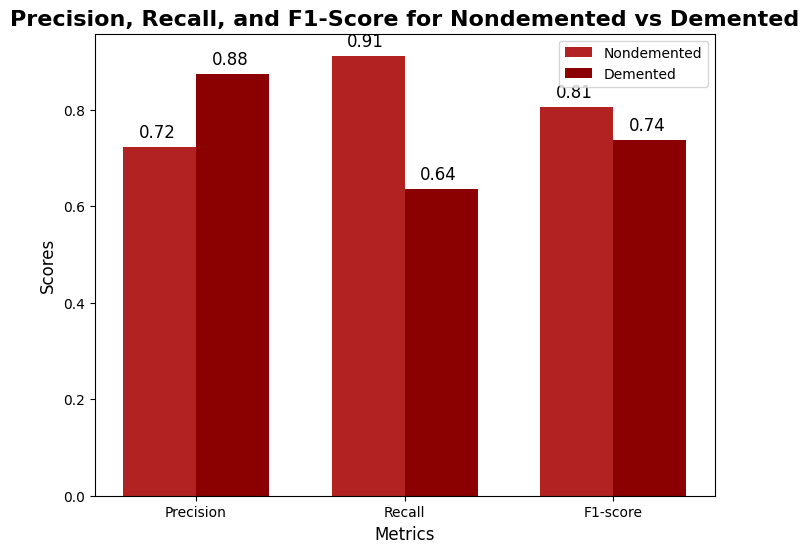

In [29]:
y_pred = search_svm.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for SVM Classifier", fontsize=16, fontweight="bold")
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index, nondemented_scores, bar_width, label="Nondemented", color="firebrick"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="darkred"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

------------
## Multilayer Perceptron (MLP) Classification
The MLP represents a class of artificial neural networks comprising multiple layers of nodes, each layer fully connected to the next in a feedforward manner. It is characterized by its ability to learn complex patterns and relationships in data through non-linear transformations facilitated by activation functions. 

In [30]:
pipeline_mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", MLPClassifier(random_state=42, max_iter=1000))
    ]
)

In [31]:
param_dist_mlp = {
    "classifier__hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 100)],
    "classifier__activation": ["relu", "tanh", "logistic"],
    "classifier__solver": ["adam", "sgd"],
    "classifier__alpha": [0.0001, 0.001, 0.01],
    "classifier__learning_rate": ["constant", "adaptive"]
}

search_mlp = RandomizedSearchCV(
    pipeline_mlp,
    param_distributions=param_dist_mlp,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_mlp.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              MLPClassifier(max_iter=1000,
                                                            random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__activation': ['relu',
                                                                   'tanh',
                                                                   'logistic'],
                                        'classifier__alpha': [0.0001, 0.001,
                                                              0.01],
                                        'classifier__hidden_layer_sizes': [(50,),
                                                                           (100,),
                                                                           (50,
                                                                            50),
                                                                           (100,
                                                                            100)],
                                        'classifier__learning_rate': ['constant',
                                                                      'adaptive'],
                                        'classifier__solver': ['adam', 'sgd']},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model correctly classified 48 instances of "Nondemented" and 24 instances of "Demented". However, there were 9 instances of "Nondemented" incorrectly classified as "Demented" and 31 instances of "Demented" misclassified as "Nondemented". These misclassifications suggest that the model struggles with distinguishing between the two classes, particularly in the case of "Demented" instances, which were frequently misclassified as "Nondemented".
  
- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.7161, which reflects a moderate ability to discriminate between the "Nondemented" and "Demented" classes. 

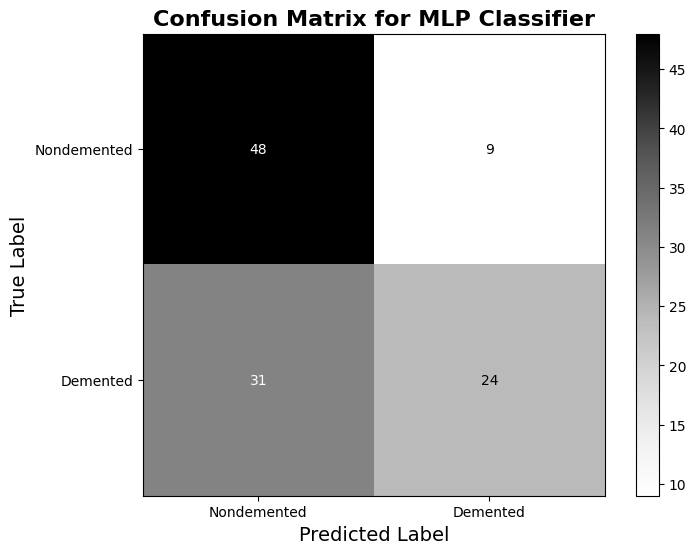

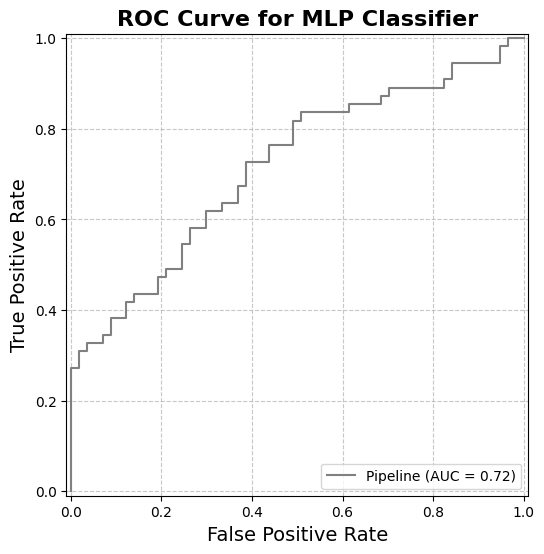

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_mlp.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Greys",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for MLP Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_mlp.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="grey"
)
ax.set_title("ROC Curve for MLP Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 61% precision, 84% recall, and an F1-score of 71%. This indicates that there was a significant number of false positives, where "Demented" instances were incorrectly classified as "Nondemented".
- Demented Class: Precision for the "Demented" class was higher at 73%, but recall was significantly lower at 44%, resulting in an F1-score of 55%. This suggests that while the model was more accurate in identifying "Demented" instances, it missed a substantial number of them, indicating a weakness in detecting true positives for this class.

Overall, the model achieved 64% accuracy, with macro and weighted averages for precision, recall, and F1-score all around 63%. It's clear that the model struggles with misclassifying "Demented" instances as "Nondemented".

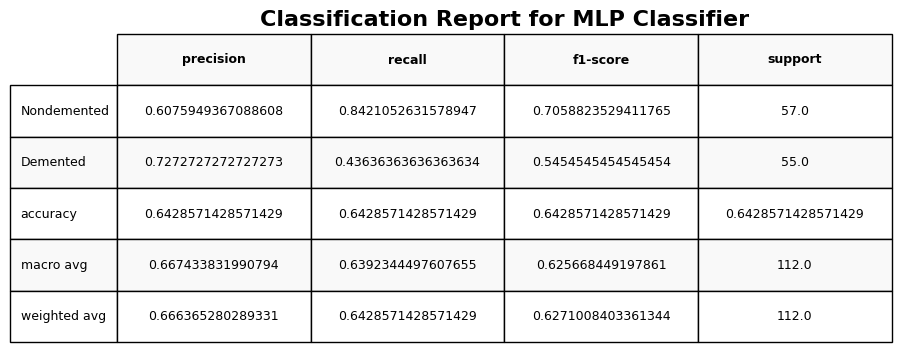

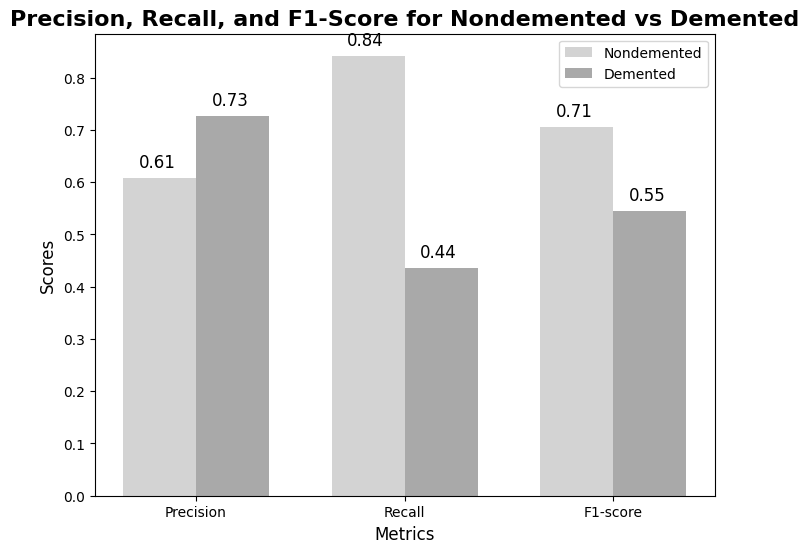

In [33]:
y_pred_mlp = search_mlp.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred_mlp, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df_mlp = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df_mlp.values,
    colLabels=report_df_mlp.columns,
    rowLabels=report_df_mlp.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df_mlp.columns),
    rowColours=["#f0f0f0"] * len(report_df_mlp.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for MLP Classifier", fontsize=16, fontweight="bold")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="lightgrey"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="darkgrey"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

-----------
## Probabilistic Neural Network (PNN) Classification
The PNN represents a class of artificial neural networks designed specifically for classification tasks. It is characterised by its use of probabilistic models to estimate the likelihood of a given input belonging to a particular class. The network comprises multiple layers, including an input layer, a pattern layer, and an output layer, where each node in the pattern layer corresponds to a training sample.

In [34]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

### Model Design and Preprocessing in PNN Pipeline
The design of the PNN model utilises progressively smaller dense layers to balance complexity and avoid overfitting, with ReLU activation aiding in capturing non-linear patterns, and a final sigmoid layer for binary classification. The Adam optimiser is chosen for its efficiency in handling sparse gradients, which is common in neural networks. StandardScaler ensures feature standardisation, which is critical for the stable convergence of the model.

In [35]:
def create_pnn_model(input_dim=8):
    model = models.Sequential(
        [
            layers.Dense(128, input_dim=input_dim, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(1, activation="sigmoid")
        ]
    )
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pipeline_pnn = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "classifier",
            KerasClassifier(
                model=create_pnn_model,
                input_dim=X_train.shape[1],
                epochs=30,
                batch_size=32
            )
        )
    ]
)

In [36]:
param_dist_pnn = {
    "classifier__epochs": [30, 50, 70],
    "classifier__batch_size": [16, 32, 64]
}

search_pnn = RandomizedSearchCV(
    pipeline_pnn,
    param_distributions=param_dist_pnn,
    n_iter=5,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    refit=True
)

search_pnn.fit(X_train, y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6211 - loss: 0.6866
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7454 - loss: 0.6424
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7807 - loss: 0.6070
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7770 - loss: 0.5755 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8069 - loss: 0.5366
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8084 - loss: 0.4956
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8105 - loss: 0.4743
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8128 - loss: 0.4556
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8102 - loss: 0.4287
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8171 - loss: 0.4089
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8300 - loss: 0.4009
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8783 - loss: 0.3685
Epoch 13/50


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              KerasClassifier(batch_size=32, epochs=30, input_dim=8, model=<function create_pnn_model at 0x00000260A36E9EE0>))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'classifier__batch_size': [16, 32, 64],
                                        'classifier__epochs': [30, 50, 70]},
                   random_state=42, scoring='roc_auc')

### Extracting and Evaluating the Best PNN Model
The best-performing PNN model is extracted from the pipeline, allowing direct access to the underlying Keras model. This separation facilitates more granular control over the model’s output. 

The subsequent prediction process involves generating probabilities for the test set and converting these to binary class labels based on a 0.5 threshold

In [37]:
pnn_model = search_pnn.best_estimator_.named_steps["classifier"].model_

y_pred_probs = pnn_model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


### Model Evaluation
- **Confusion Matrix**: The model accurately classified 47 instances of "Nondemented" and 38 instances of "Demented". However, it misclassified 10 "Nondemented" instances as "Demented" and 17 "Demented" instances as "Nondemented". These errors indicate that while the model demonstrates a reasonable ability to distinguish between the classes, it struggles more with identifying "Demented" cases, as evidenced by the higher number of false positives.

- **ROC Curve**: The Area Under the Curve (AUC) score of 0.8531 signifies a strong overall performance, indicating that the model is generally effective at discriminating between "Nondemented" and "Demented" cases.

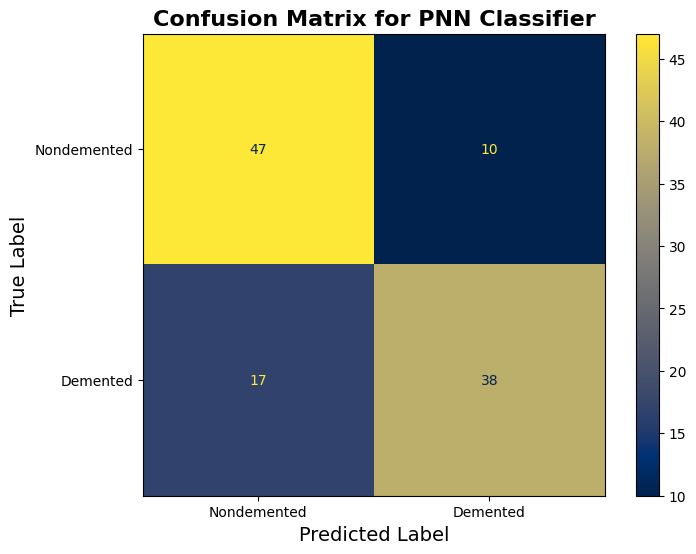

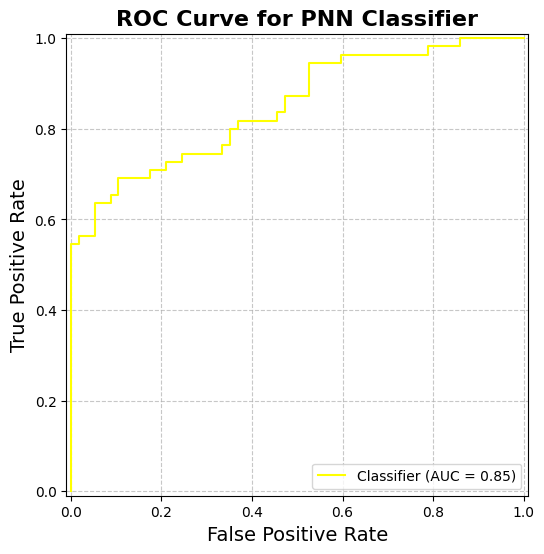

In [38]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Nondemented", "Demented"]
)
disp.plot(cmap="cividis", ax=ax, colorbar=True)
plt.title("Confusion Matrix for PNN Classifier", fontsize=16, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_pred_probs, ax=ax, color="yellow")
ax.set_title("ROC Curve for PNN Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved a precision of 73%, recall of 82%, and an F1-score of 78%. These metrics indicate that it has a notable shortfall in precision, suggesting that many false "Nondemented" instances are being misclassified as "Nondemented".
- Demented Class: The model obtained a precision of 79%, recall of 69%, and an F1-score of 74%. The lower recall suggests that the model is worse at identifying most "Demented" cases, but the higher precision indicates a lower rate of false positives. 

With an accuracy of 76%, and both macro and weighted averages at 75%-76%, the model demonstrates balanced but not optimal performance across both classes. The higher recall for the "Nondemented" class is beneficial in clinical contexts where missing true positive cases could have severe consequences, but the trade-off in precision necessitates further optimisation.

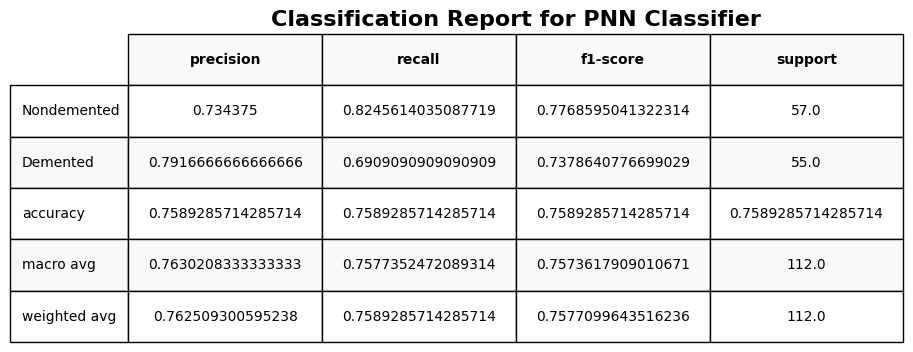

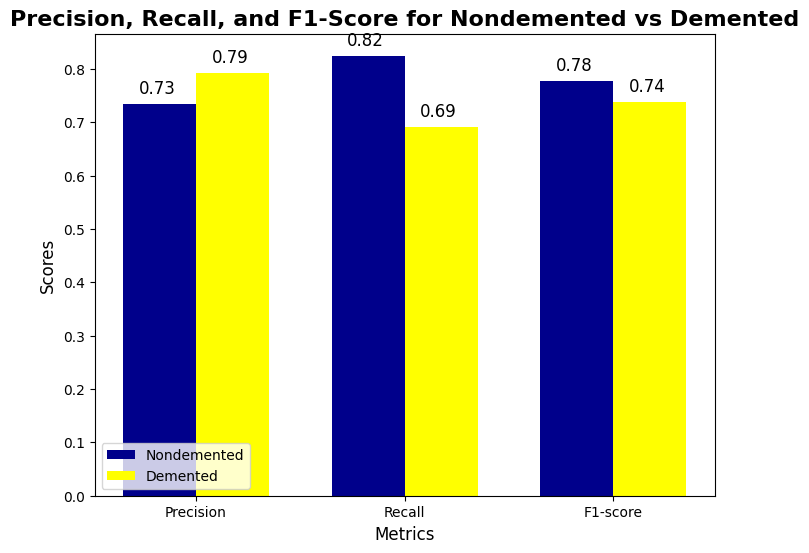

In [39]:
report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)
report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for PNN Classifier", fontsize=16, fontweight="bold")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="darkblue"
)

bar2 = ax.bar(
    index + bar_width,
    demented_scores,
    bar_width,
    label="Demented",
    color="yellow"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

----------------------
## Light Gradient Boosting Machine (LGBM) Classification
The LGBM Classifier is a machine learning model used for classification tasks. It optimises classification by constructing multiple decision trees sequentially, with each tree correcting the errors of the previous one. This approach combines the efficiency of boosting with advanced techniques in gradient reduction and data partitioning, resulting in a fast and accurate model for large and complex datasets.

In [40]:
pipeline_lgbm = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LGBMClassifier(random_state=42))
    ]
)

In [41]:
param_dist_lgbm = {
    "classifier__num_leaves": [31, 50, 70],
    "classifier__max_depth": [-1, 10, 20],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__n_estimators": [100, 200, 300],
    "classifier__min_child_samples": [10, 20, 30],
    "classifier__subsample": [0.8, 0.9, 1.0],
    "classifier__colsample_bytree": [0.8, 0.9, 1.0]
}

search_lgbm = RandomizedSearchCV(
    pipeline_lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 128, number of negative: 133
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 302
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490421 -> initscore=-0.038319
[LightGBM] [Info] Start training from score -0.038319
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              LGBMClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.8,
                                                                         0.9,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [-1, 10, 20],
                                        'classifier__min_child_samples': [10,
                                                                          20,
                                                                          30],
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'classifier__num_leaves': [31, 50, 70],
                                        'classifier__subsample': [0.8, 0.9,
                                                                  1.0]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model correctly identified 49 instances of "Nondemented" and 39 instances of "Demented". However, it also misclassified 8 "Nondemented" instances as "Demented" and 16 "Demented" instances as "Nondemented". These misclassifications reflect some challenges in the model's ability to distinguish between the two classes, especially when there is overlap in the feature space or subtle differences between the groups. 

- **ROC Curve**: The model attained an Area Under the Curve (AUC) score of 0.8801, suggesting strong overall performance. An AUC of 0.88 indicates the model’s ability to differentiate between the "Nondemented" and "Demented" categories with a high degree of accuracy.

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


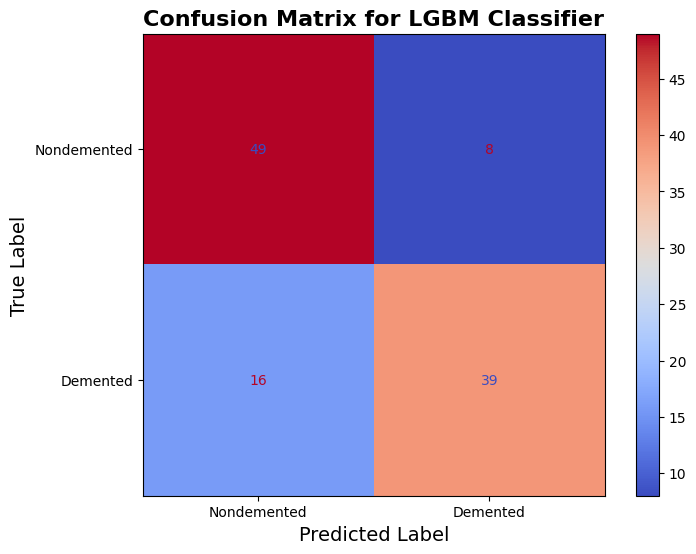

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


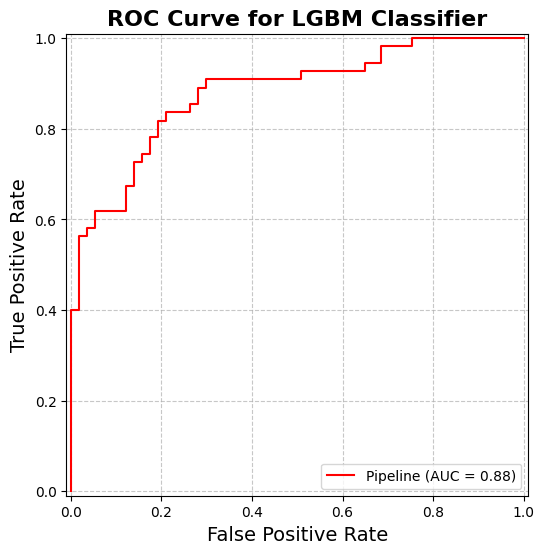

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_lgbm.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="coolwarm",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for LGBM Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_lgbm.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="red"
)
ax.set_title("ROC Curve for LGBM Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model attained a precision of 75%, recall of 86%, and an F1-score of 80%. This indicates a relatively strong performance in identifying "Nondemented" instances, with the model being particularly good at minimising false positives.
- Demented Class: The model achieved a precision of 83%, recall of 71%, and an F1-score of 76%. While the precision is relatively high, the recall is somewhat lower, suggesting that the model may struggle to identify all true positives.

Overall, the model achieved an accuracy of 79%, with both macro and weighted averages around 78%. This suggests fairly balanced performance between the two classes, though the model still faces challenges in detecting "Demented" instances accurately.

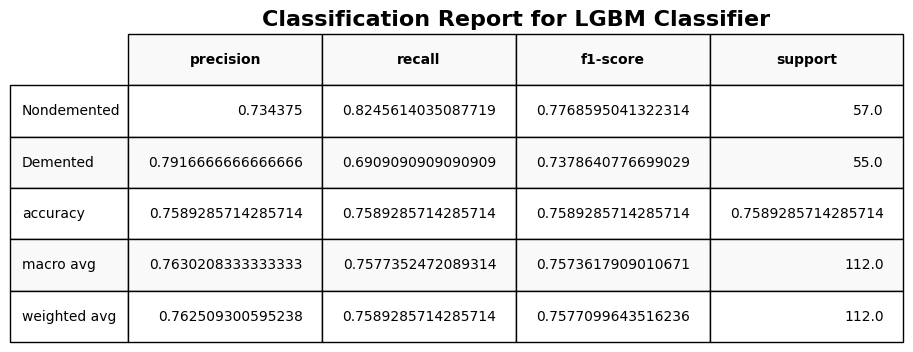

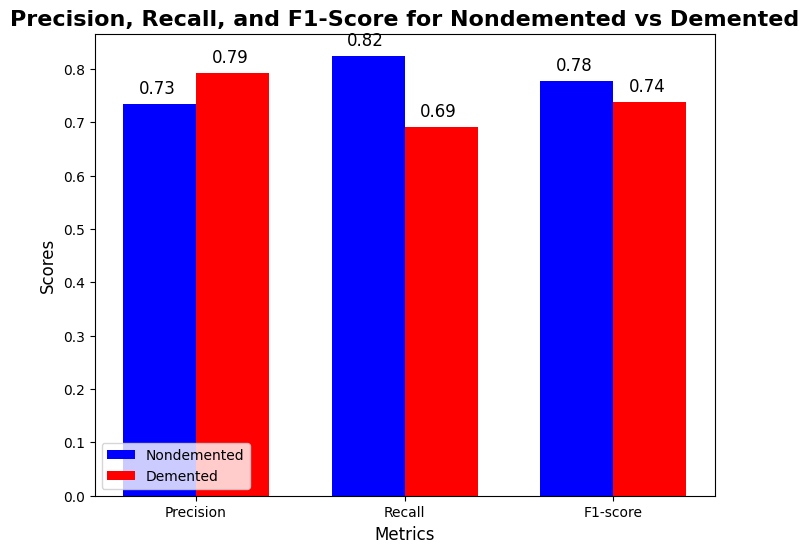

In [43]:
report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)
report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"]
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"]
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")

table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,

    loc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for LGBM Classifier", fontsize=16, fontweight="bold")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="blue"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="red"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

-------------
## Gradient Boosting Classification
A Gradient Boosting Classifier is an ensemble learning method used for classification tasks. It builds a strong predictive model by combining the outputs of several weaker models, typically decision trees, in a sequential manner. Each subsequent model corrects the errors of its predecessor by optimizing a loss function using gradient descent, leading to improved overall performance.

In [44]:
pipeline_gb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier(random_state=42))
    ]
)

In [45]:
param_dist_gb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 4, 5],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__subsample": [0.8, 0.9, 1.0],
    "classifier__max_features": ["sqrt", "log2", None]
}

search_gb = RandomizedSearchCV(
    pipeline_gb,
    param_distributions=param_dist_gb,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__learning_rate': [0.01, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [3, 4, 5],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'classifier__subsample': [0.8, 0.9,
                                                                  1.0]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model accurately identified 52 instances of "Nondemented" and 42 instances of "Demented". However, it misclassified 5 "Nondemented" instances as "Demented" and 13 "Demented" instances as "Nondemented". These misclassifications suggest that while the model is effective in distinguishing between the two classes.

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.8925, indicating strong overall performance. An AUC value close to 1 signifies excellent discriminatory power, meaning that the model is highly proficient at distinguishing between the "Nondemented" and "Demented" categories.

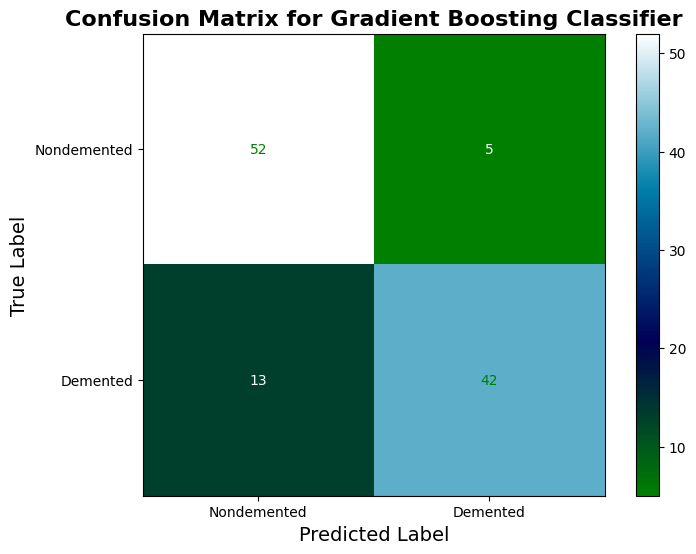

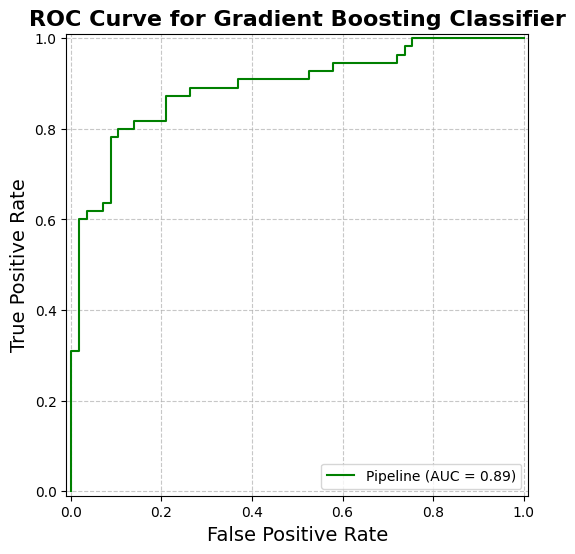

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_gb.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="ocean",
    ax=ax,
    colorbar=True
)
ax.set_title(
    "Confusion Matrix for Gradient Boosting Classifier", fontsize=16, fontweight="bold"
)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_gb.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="green"
)
ax.set_title(
    "ROC Curve for Gradient Boosting Classifier", fontsize=16, fontweight="bold"
)
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 80% precision, 91% recall, and an F1-score of 85%. This indicates that the model is highly efficient at identifying "Nondemented" instances, with a relatively low rate of false positives and a strong ability to correctly classify most true "Nondemented" cases.
- Demented Class: Precision was higher at 89%, but recall was somewhat lower at 76%, resulting in an F1-score of 82%. While the precision indicates fewer false positives, the lower recall points to a trade-off where some "Demented" instances are misclassified as "Nondemented".

Overall, the model achieved 84% accuracy with balanced macro and weighted averages of 84%. The performance is solid, though the model struggles more with misclassifying "Demented" instances as "Nondemented".

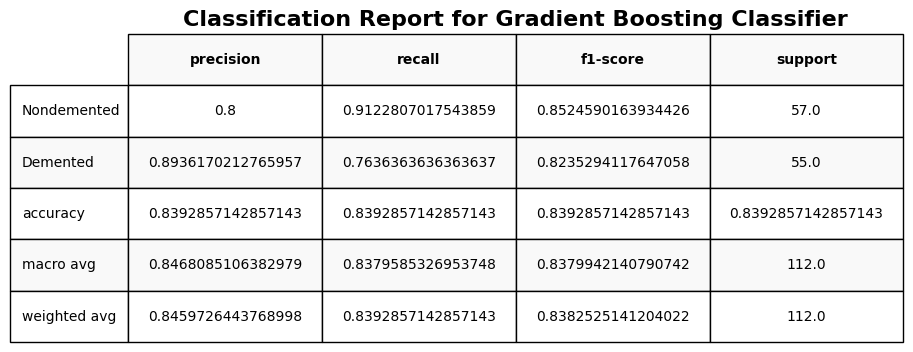

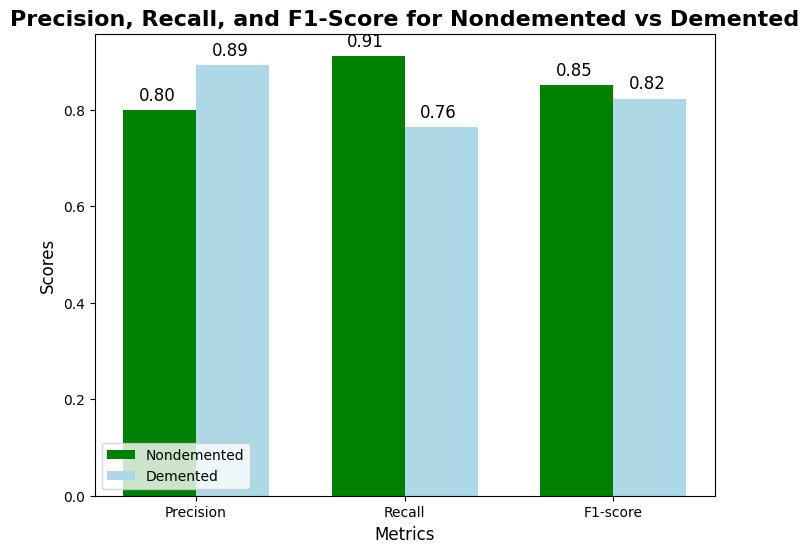

In [47]:
y_pred_gb = search_gb.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred_gb, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df_gb = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"],
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"],
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df_gb.values,
    colLabels=report_df_gb.columns,
    rowLabels=report_df_gb.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df_gb.columns),
    rowColours=["#f0f0f0"] * len(report_df_gb.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title(
    "Classification Report for Gradient Boosting Classifier",
    fontsize=16,
    fontweight="bold"
)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="green"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="lightblue"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

--------------------
## Adaptive Boosting (AdaBoost) Classification
The AdaBoost Classifier is an ensemble learning method that combines multiple weak classifiers to create a strong classifier. It sequentially adjusts weights on misclassified instances, allowing subsequent models to focus on correcting errors. This adaptive approach improves prediction accuracy and reduces bias, while also being resistant to overfitting when properly tuned

In [48]:
pipeline_adaboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", AdaBoostClassifier(random_state=42))
    ]
)

In [49]:
param_dist_adaboost = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__learning_rate": [0.01, 0.1, 1, 10],
    "classifier__algorithm": ["SAMME"]
}

search_adaboost = RandomizedSearchCV(
    pipeline_adaboost,
    param_distributions=param_dist_adaboost,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_adaboost.fit(X_train, y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              AdaBoostClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__algorithm': ['SAMME'],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      1, 10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: he model correctly identified 47 instances of "Nondemented" and 36 instances of "Demented". However, it misclassified 10 "Nondemented" instances as "Demented" and 19 "Demented" instances as "Nondemented". These misclassifications reflect the model’s limitations and highlight areas for potential improvement, particularly in distinguishing between the two classes.

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.8241, indicating good performance in distinguishing between the two classes. An AUC of 0.8241 signifies that the model has solid discriminatory power, but there is still some room for improvement.

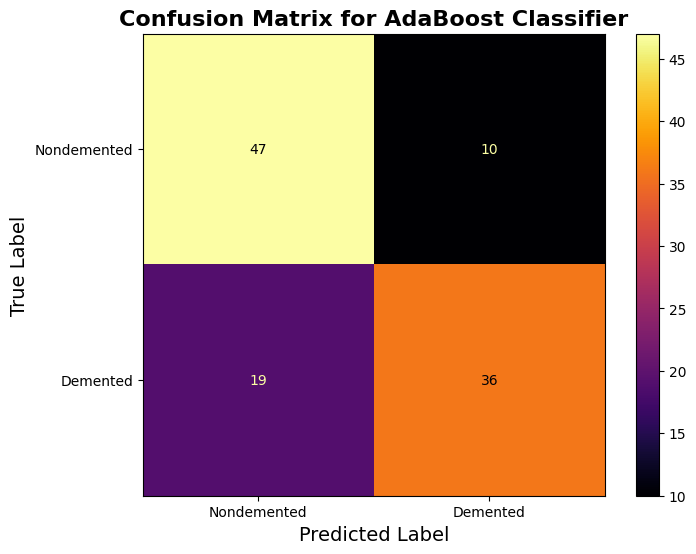

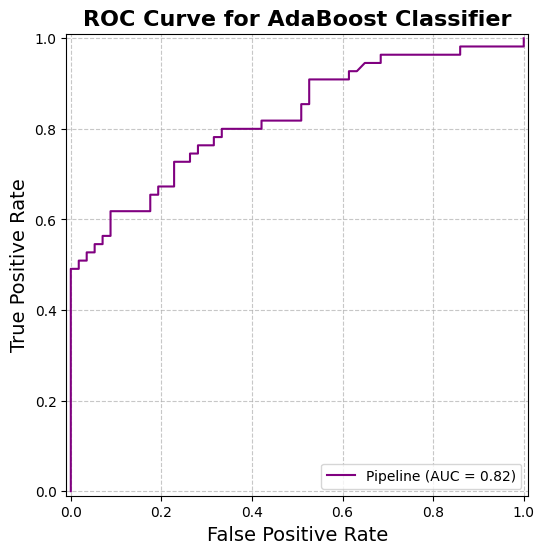

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_adaboost.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="inferno",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for AdaBoost Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_adaboost.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="purple"
)
ax.set_title("ROC Curve for AdaBoost Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 71% precision, 82% recall, and an F1-score of 76%. This indicates that the model is more effective at correctly identifying instances of "Nondemented".
- Demented Class: The model performed slightly better in terms of precision for the "Demented" class, with 78%, but recall was lower at 65%, resulting in an F1-score of 71%. This suggests that the model has a tendency to miss "Demented" instances, leading to false negatives.

Overall, the model achieved 74% accuracy, with macro and weighted averages both around 74%. While the accuracy is reasonable, the imbalance between precision and recall for each class reflects the model's challenges in distinguishing between "Nondemented" and "Demented".

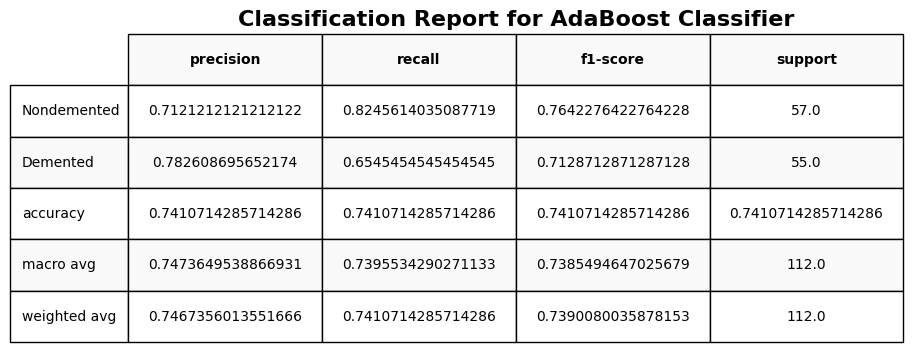

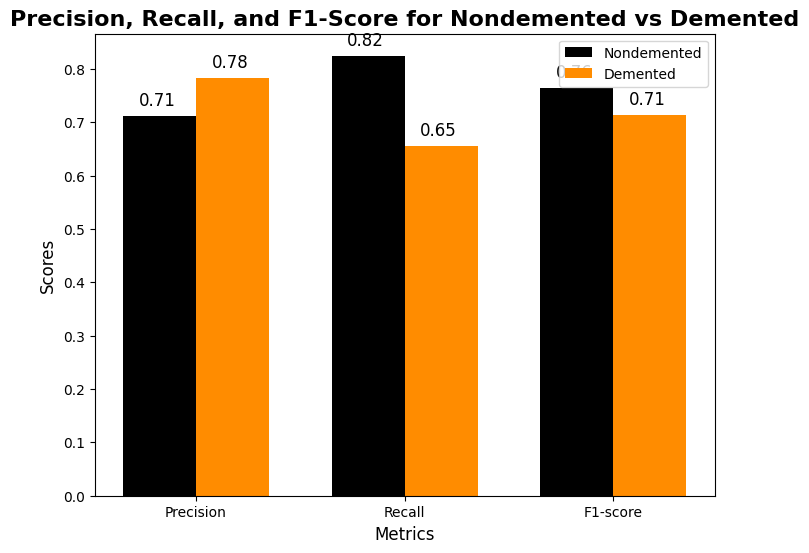

In [51]:
y_pred_adaboost = search_adaboost.best_estimator_.predict(X_test)

report_adaboost = classification_report(
    y_test, y_pred_adaboost, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df_adaboost = pd.DataFrame(report_adaboost).transpose()

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df_adaboost.values,
    colLabels=report_df_adaboost.columns,
    rowLabels=report_df_adaboost.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df_adaboost.columns),
    rowColours=["#f0f0f0"] * len(report_df_adaboost.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title(
    "Classification Report for AdaBoost Classifier", fontsize=16, fontweight="bold"
)
plt.show()

nondemented_scores = [
    report_adaboost["Nondemented"]["precision"],
    report_adaboost["Nondemented"]["recall"],
    report_adaboost["Nondemented"]["f1-score"],
]

demented_scores = [
    report_adaboost["Demented"]["precision"],
    report_adaboost["Demented"]["recall"],
    report_adaboost["Demented"]["f1-score"],
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="black"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="darkorange"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

--------------------
## Gaussian Naive Bayes (Gaussian NB) Classification
The Gaussian NB classifier is a fundamental machine learning model grounded in Bayes' theorem, tailored for classification tasks. It assumes that features follow a Gaussian distribution and calculates probabilities to make predictions based on conditional independence.

In [52]:
pipeline_gaussian_nb = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", GaussianNB())
    ]
)

In [53]:
param_dist_gaussian_nb = {
    "classifier__priors": [None, [0.5, 0.5], [0.7, 0.3]],
    "classifier__var_smoothing": [1e-9, 1e-8, 1e-7]
}

search_gaussian_nb = RandomizedSearchCV(
    pipeline_gaussian_nb,
    param_distributions=param_dist_gaussian_nb,
    n_iter=1,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_gaussian_nb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier', GaussianNB())]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'classifier__priors': [None, [0.5, 0.5],
                                                               [0.7, 0.3]],
                                        'classifier__var_smoothing': [1e-09,
                                                                      1e-08,
                                                                      1e-07]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model successfully identified 55 instances of "Nondemented" and 30 instances of "Demented". However, it misclassified 2 "Nondemented" instances as "Demented" and 25 "Demented" instances as "Nondemented". These misclassifications suggest that the model has a high rate of false negatives.

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.84, which signifies strong overall performance. An AUC of this level indicates that there is a need of reducing misclassifications in borderline cases.

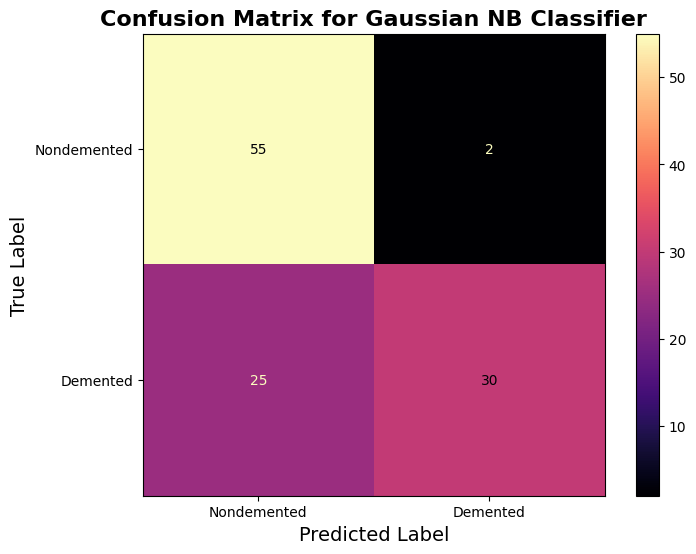

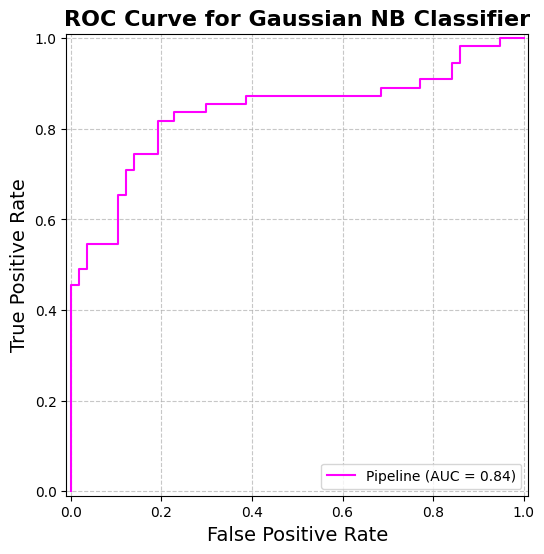

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_gaussian_nb.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="magma",
    ax=ax,
    colorbar=True
)
ax.set_title(
    "Confusion Matrix for Gaussian NB Classifier", fontsize=16, fontweight="bold"
)
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_gaussian_nb.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="magenta"
)
ax.set_title("ROC Curve for Gaussian NB Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved a precision of 68.8%, a recall of 96.5%, and an F1-score of 80.3%. The high recall suggests that the model is very good at identifying "Nondemented" instances, but the lower precision indicates that it sometimes misidentifies "Demented" instances.
- Demented Class: Precision was higher at 93.8%, but recall was much lower at 54.5%, resulting in an F1-score of 69%. Although the model is accurate when it classifies instances as "Demented", it struggles to correctly identify all actual "Demented" cases, leading to many false negatives.

Overall, the model achieved an accuracy of 75.9%, with the macro average F1-score at 74.6% and the weighted average F1-score at 74.7%. These metrics reflect a generally balanced model performance, though the significant discrepancy in recall between the classes suggests that improvements are needed in correctly identifying "Demented" cases.

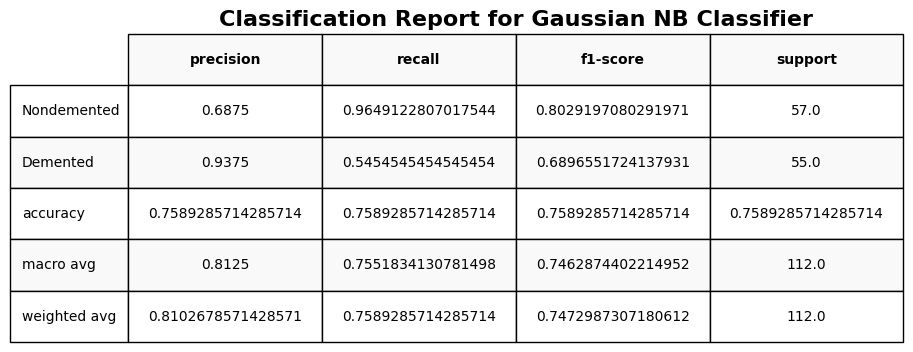

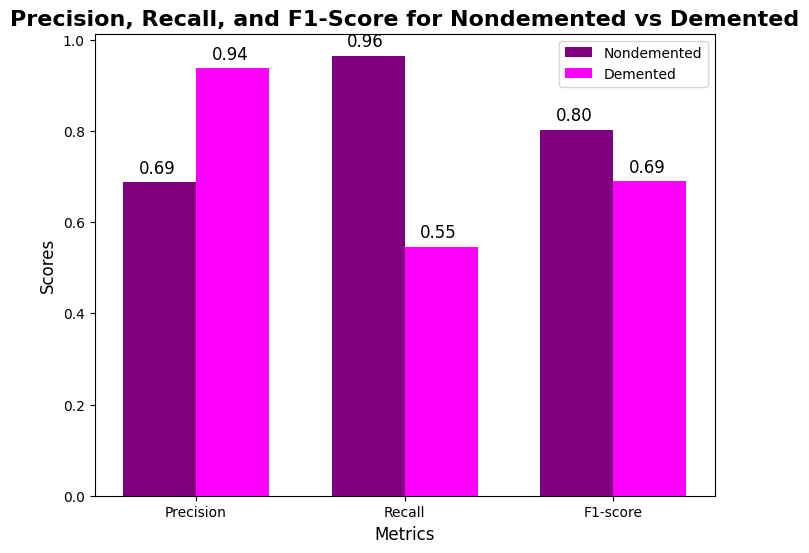

In [55]:
y_pred = search_gaussian_nb.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"],
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"],
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title(
    "Classification Report for Gaussian NB Classifier", fontsize=16, fontweight="bold"
)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="purple"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="magenta"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

--------------------
## K-Nearest Neighbors (KNN) Classification
The K-Nearest Neighbors (KNN) classifier is a simple, non-parametric supervised learning algorithm used for classification and regression. It predicts the class of a data point based on the most frequent class among its "K" closest neighbours in the feature space, without making assumptions about the data distribution.

In [56]:
pipeline_knn = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier())
    ]
)

In [57]:
param_dist_knn = {
    "classifier__n_neighbors": [3, 5, 7, 9],
    "classifier__weights": ["uniform", "distance"],
    "classifier__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "classifier__p": [1, 2]
}

search_knn = RandomizedSearchCV(
    pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__algorithm': ['auto',
                                                                  'ball_tree',
                                                                  'kd_tree',
                                                                  'brute'],
                                        'classifier__n_neighbors': [3, 5, 7, 9],
                                        'classifier__p': [1, 2],
                                        'classifier__weights': ['uniform',
                                                                'distance']},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model accurately predicted 46 instances of "Nondemented" and 34 instances of "Demented". However, it misclassified 11 "Nondemented" instances as "Demented" and 21 "Demented" instances as "Nondemented". These misclassifications may indicate a bias towards predicting the "Nondemented" class.

- **ROC Curve**: The model achieved an ROC AUC score of 0.79, which signifies a good level of discriminatory power. An AUC score of 0.79 suggests that the model is reasonably effective at distinguishing between "Nondemented" and "Demented" classes.

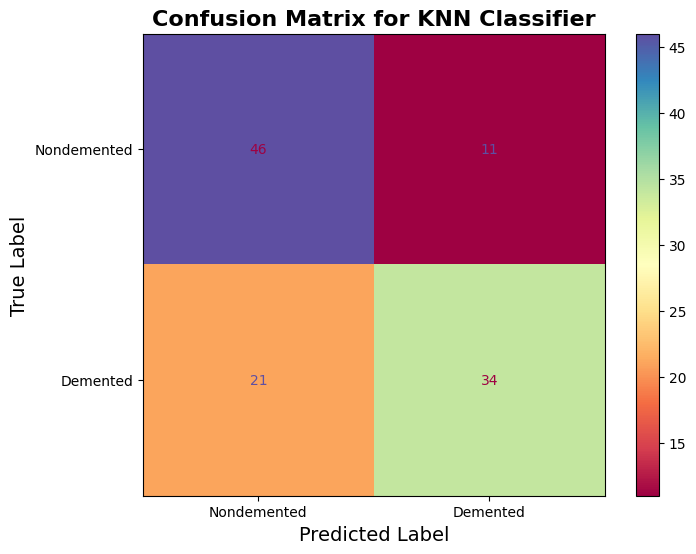

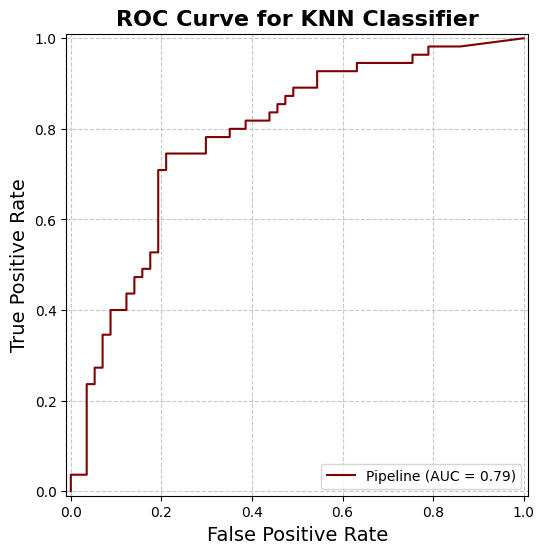

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_knn.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="Spectral",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for KNN Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_knn.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="maroon"
)
ax.set_title("ROC Curve for KNN Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved a precision of 69%, recall of 81%, and an F1-score of 74%, indicating relatively strong performance in identifying true negatives.
- Demented Class: The model achieved a precision of 76%, a recall of 62%, and an F1-score of 68%. While the precision is reasonably strong, recall remains lower, reflecting a weaker ability to detect true positives.

Overall, the model achieves reasonable accuracy at 78%, with balanced macro and weighted averages around 78.5%. There are significant challenges in correctly identifying instances of "Demented," which could impact its utility in diagnostic or clinical applications.

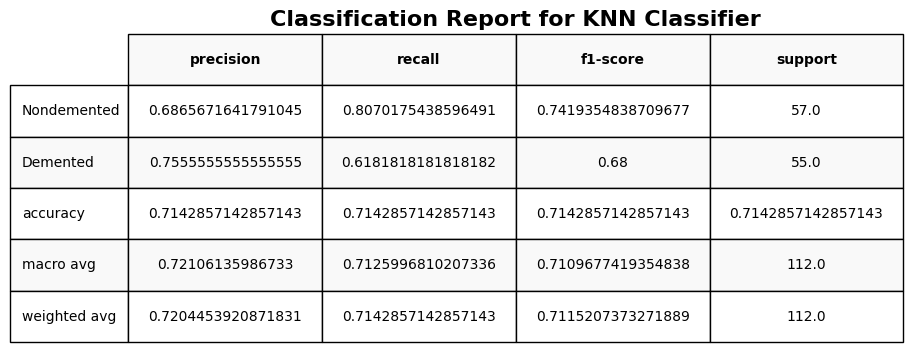

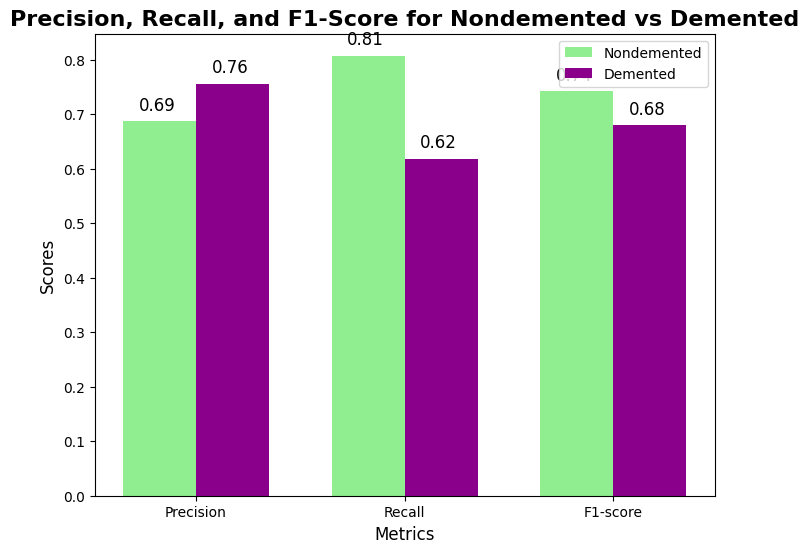

In [59]:
y_pred = search_knn.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"],
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"],
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for KNN Classifier", fontsize=16, fontweight="bold")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="lightgreen"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="darkmagenta"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

--------------------
## Voting Classification
A Voting Classifier is a machine learning ensemble method that combines multiple individual classifiers to make a final prediction. Each classifier votes based on its own prediction, and the majority vote or weighted vote determines the output. This approach enhances model accuracy and robustness by leveraging the strengths of various classifiers.

In [60]:
clf1 = LogisticRegression(random_state=42)
clf2 = SVC(random_state=42, probability=True)
clf3 = DecisionTreeClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", clf1), ("svc", clf2), ("dt", clf3)],
    voting="soft"
)

pipeline_voting = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", voting_clf)]
)

In [61]:
param_dist_voting = {
    "classifier__lr__C": [0.1, 1, 10],
    "classifier__svc__C": [0.1, 1, 10],
    "classifier__dt__max_depth": [None, 10, 20, 30],
    "classifier__dt__min_samples_split": [2, 5, 10],
    "classifier__dt__min_samples_leaf": [1, 2, 4]
}

search_voting = RandomizedSearchCV(
    pipeline_voting,
    param_distributions=param_dist_voting,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

search_voting.fit(X_train, y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              VotingClassifier(estimators=[('lr',
                                                                            LogisticRegression(random_state=42)),
                                                                           ('svc',
                                                                            SVC(probability=True,
                                                                                random_state=42)),
                                                                           ('dt',
                                                                            DecisionTreeClassifier(random_state=42))],
                                                               voting='soft'))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__dt__max_depth': [None, 10,
                                                                      20, 30],
                                        'classifier__dt__min_samples_leaf': [1,
                                                                             2,
                                                                             4],
                                        'classifier__dt__min_samples_split': [2,
                                                                              5,
                                                                              10],
                                        'classifier__lr__C': [0.1, 1, 10],
                                        'classifier__svc__C': [0.1, 1, 10]},
                   random_state=42, scoring='roc_auc')

### Model Evaluation
- **Confusion Matrix**: The model correctly identified 41 instances of "Nondemented" and 41 instances of "Demented". However, it misclassified 16 "Nondemented" instances as "Demented" and 14 "Demented" instances as "Nondemented". The relatively balanced errors suggest that the model might be struggling with class overlap or subtle distinctions between the categories.

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.8523, indicating strong performance. An AUC of this magnitude suggests that the model is highly effective at differentiating between the "Nondemented" and "Demented" categories, with a good ability to distinguish between positive and negative instances.

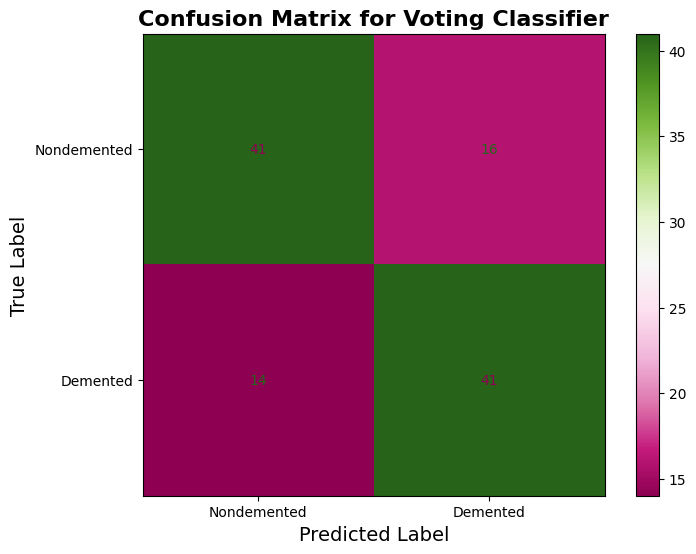

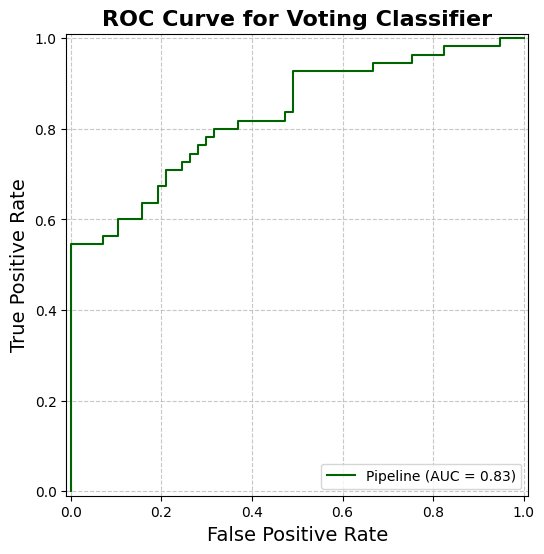

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    search_voting.best_estimator_,
    X_test,
    y_test,
    display_labels=["Nondemented", "Demented"],
    cmap="PiYG",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix for Voting Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    search_voting.best_estimator_,
    X_test,
    y_test,
    ax=ax,
    color="darkgreen"
)
ax.set_title("ROC Curve for Voting Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved 72% precision, 74% recall, and an F1-score of 73%, indicating reasonable performance in identifying true negatives.
- Demented Class: Precision was slightly higher at 74%, with recall at 74%, resulting in an F1-score of 74%. This suggests a balanced performance in detecting true positives for this class.

Overall, the model achieved 77.7% accuracy with balanced macro and weighted averages close to 74%. While the model performs well overall, it struggles with a fair number of misclassifications.

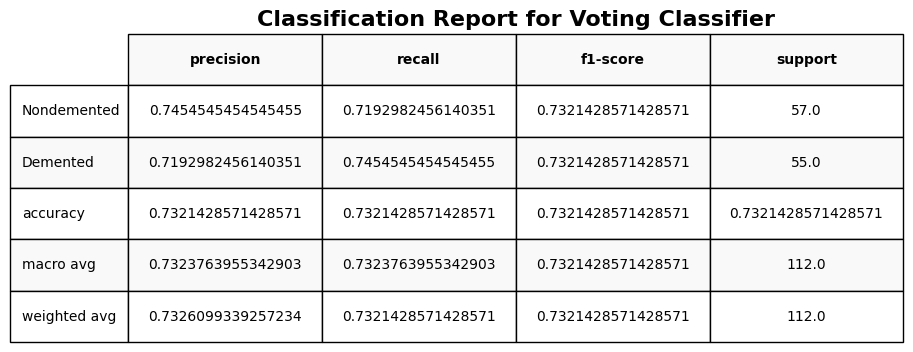

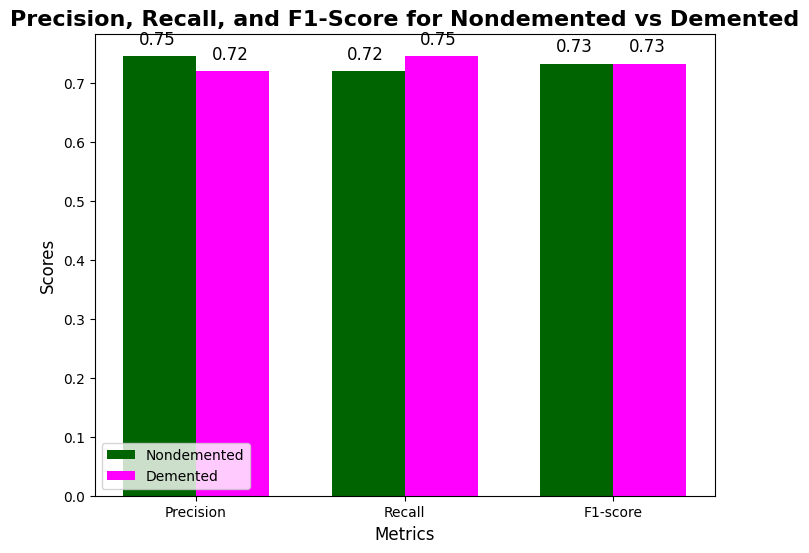

In [63]:
y_pred = search_voting.best_estimator_.predict(X_test)

report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"],
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"],
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for Voting Classifier", fontsize=16, fontweight="bold")
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="darkgreen"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="fuchsia"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

--------------------
## TabNet Classification
A TabNet classifier is an advanced deep learning model designed for tabular data, leveraging attention mechanisms to efficiently learn feature dependencies and hierarchical relationships. TabNet combines the benefits of decision trees with deep neural networks, enabling it to capture complex patterns within structured datasets.

In [64]:
pipeline_tabnet = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", TabNetClassifier(verbose=0, seed=42))
    ]
)

In [65]:
param_dist_tabnet = {
    "classifier__n_d": [8, 16, 24],
    "classifier__n_a": [8, 16, 24],
    "classifier__n_steps": [3, 5, 7],
    "classifier__gamma": [1.0, 1.5, 2.0],
    "classifier__lambda_sparse": [1e-4, 1e-3, 1e-2],
    "classifier__momentum": [0.02, 0.03, 0.04]
}

search_tabnet = RandomizedSearchCV(
    pipeline_tabnet,
    param_distributions=param_dist_tabnet,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

search_tabnet.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['Age',
                                                                                'EDUC',
                                                                                'SES',
                                                                                'MMSE',
                                                                                'eTIV',
                                                                                'nWBV',
                                                                                'ASF']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['M/F'])])),
                                             ('classifier',
                                              TabNetClassifier(n_d=8,
                                                               n_a=8,
                                                               n_steps=3,
                                                               gamma=1.3,
                                                               cat_idxs=[],
                                                               cat_dims=[],
                                                               cat_emb_dim=[],
                                                               n_independent=2,
                                                               n_shared=2,
                                                               epsilon=1e-15,
                                                               mome...
                                                               n_shared_decoder=1,
                                                               n_indep_decoder=1,
                                                               grouped_features=[]))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__gamma': [1.0, 1.5, 2.0],
                                        'classifier__lambda_sparse': [0.0001,
                                                                      0.001,
                                                                      0.01],
                                        'classifier__momentum': [0.02, 0.03,
                                                                 0.04],
                                        'classifier__n_a': [8, 16, 24],
                                        'classifier__n_d': [8, 16, 24],
                                        'classifier__n_steps': [3, 5, 7]},
                   random_state=42, scoring='roc_auc', verbose=2)

### Model Evaluation
- **Confusion Matrix**: The model correctly identified 16 instances of "Nondemented" and 38 instances of "Demented". However, it misclassified 41 "Nondemented" instances as "Demented" and 17 "Demented" instances as "Nondemented". These results reveal significant challenges in the model’s ability to differentiate between the two classes, with a notably high number of misclassifications.

- **ROC Curve**: The model achieved an Area Under the Curve (AUC) score of 0.5010, which is only marginally better than random guessing. This low AUC score indicates that the model lacks effective discriminatory power and struggles to reliably distinguish between "Nondemented" and "Demented" cases.

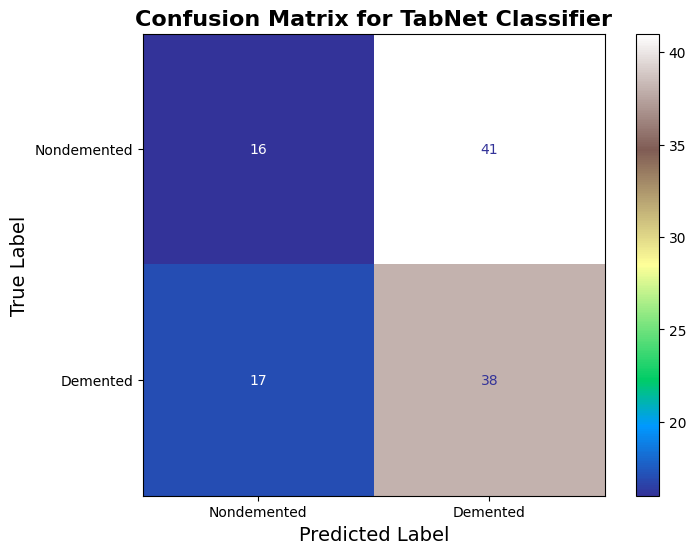

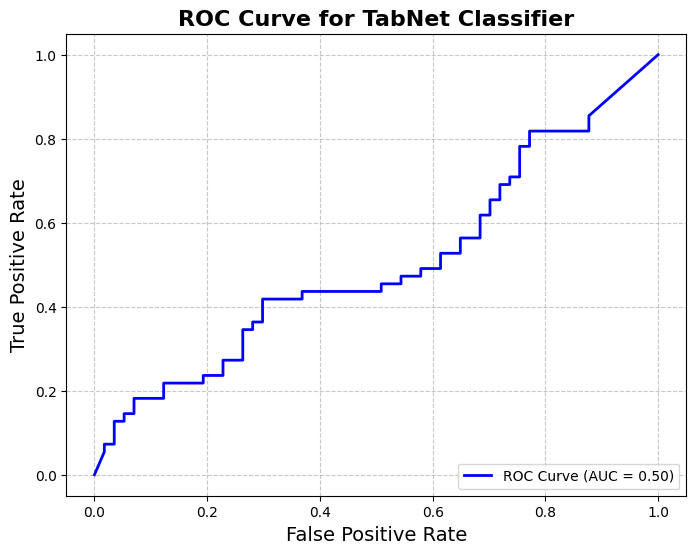

In [66]:
y_pred = search_tabnet.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Nondemented", "Demented"]
)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="terrain", ax=ax, colorbar=True)
ax.set_title("Confusion Matrix for TabNet Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.show()


y_proba = search_tabnet.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
ax.set_title("ROC Curve for TabNet Classifier", fontsize=16, fontweight="bold")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
ax.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

##### Model Evaluation: Precision, Recall, and F1-Score Analysis
- Nondemented Class: The model achieved a precision of 48%, indicating that less than half of the predicted "Nondemented" cases were correctly classified. Recall was notably lower at 28%, signifying substantial difficulty in identifying true negatives within this class. Consequently, the F1-score was 36%, reflecting an imbalance between precision and recall.
- Demented Class: Precision was equivalent to the "Nondemented" class at 48%, but recall was markedly higher at 69%, demonstrating better performance in identifying true positives. This resulted in an F1-score of 57%, suggesting the model performed comparatively better in this class, though still below acceptable standards.

The model achieved an accuracy of 48%, with macro and weighted averages for precision, recall, and F1-score hovering around 48% and 46%, respectively. These figures underscore a lack of discriminatory power across both classes, with the model particularly struggling to correctly identify "Nondemented" instances.

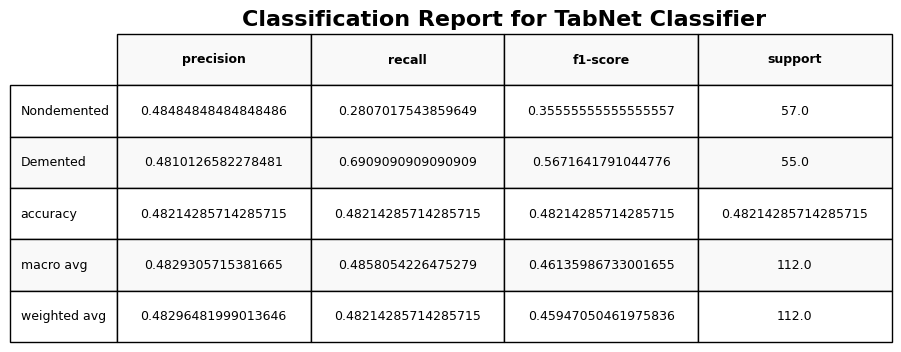

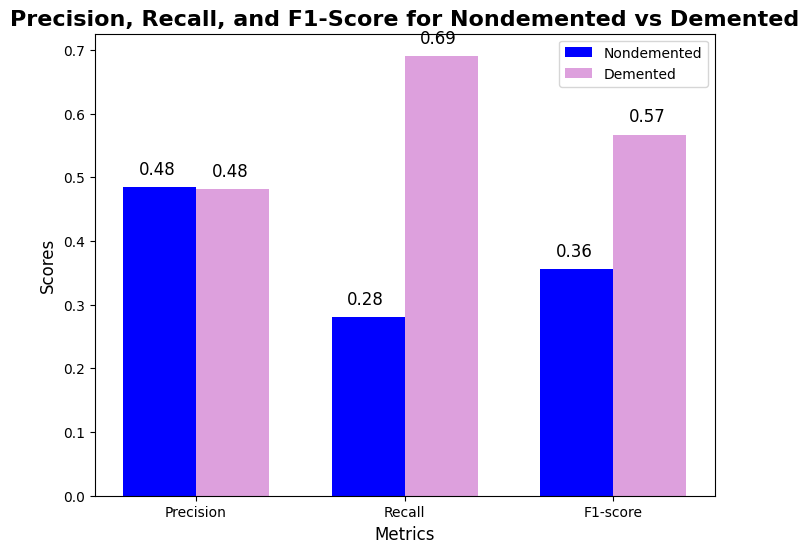

In [67]:
report = classification_report(
    y_test, y_pred, target_names=["Nondemented", "Demented"], output_dict=True
)

report_df = pd.DataFrame(report).transpose()

nondemented_scores = [
    report["Nondemented"]["precision"],
    report["Nondemented"]["recall"],
    report["Nondemented"]["f1-score"],
]

demented_scores = [
    report["Demented"]["precision"],
    report["Demented"]["recall"],
    report["Demented"]["f1-score"],
]

total_accuracy[total_models[cont]] = report["accuracy"]
cont += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")
table = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc="center",
    cellLoc="center",
    colColours=["#f0f0f0"] * len(report_df.columns),
    rowColours=["#f0f0f0"] * len(report_df.index),
    bbox=[0, 0, 1, 1]
)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#e0e0e0")
    if i % 2 == 0:
        cell.set_facecolor("#f9f9f9")
    else:
        cell.set_facecolor("#ffffff")

plt.title("Classification Report for TabNet Classifier", fontsize=16, fontweight="bold")
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = range(len(evaluation_metrics))

bar1 = ax.bar(
    index,
    nondemented_scores,
    bar_width,
    label="Nondemented",
    color="blue"
)

bar2 = ax.bar(
    [p + bar_width for p in index],
    demented_scores,
    bar_width,
    label="Demented",
    color="plum"
)

for i, v in enumerate(nondemented_scores):
    ax.text(i - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

for i, v in enumerate(demented_scores):
    ax.text(i + bar_width - 0.1, v + 0.02, f"{v:.2f}", color="black", fontsize=12)

ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title(
    "Precision, Recall, and F1-Score for Nondemented vs Demented",
    fontsize=16,
    fontweight="bold"
)
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(evaluation_metrics)
ax.legend()
plt.show()

--------------------
--------------------
## Accuracy Comparison

Ranking models based on their accuracy and summarising their performance provides a systematic way to assess and compare their effectiveness. Sorting the models by accuracy highlights the best-performing ones, which can then be prioritised for further analysis or practical application. Calculating the mean accuracy gives an overall measure of performance across all models, while the median accuracy provides a more robust indicator of central tendency, particularly when dealing with potential outliers. These steps facilitate a deeper understanding of model performance, ensuring that both individual and collective trends are accounted for in the evaluation process.

In [77]:
sorted_models = sorted(total_accuracy.items(), key=lambda x: x[1], reverse=True)
sorted_accuracy = dict(sorted(total_accuracy.items(), key=lambda x: x[1], reverse=True))
models, accuracies = zip(*sorted_models)

mean_accuracy = np.mean(accuracies)
median_accuracy = np.median(accuracies)

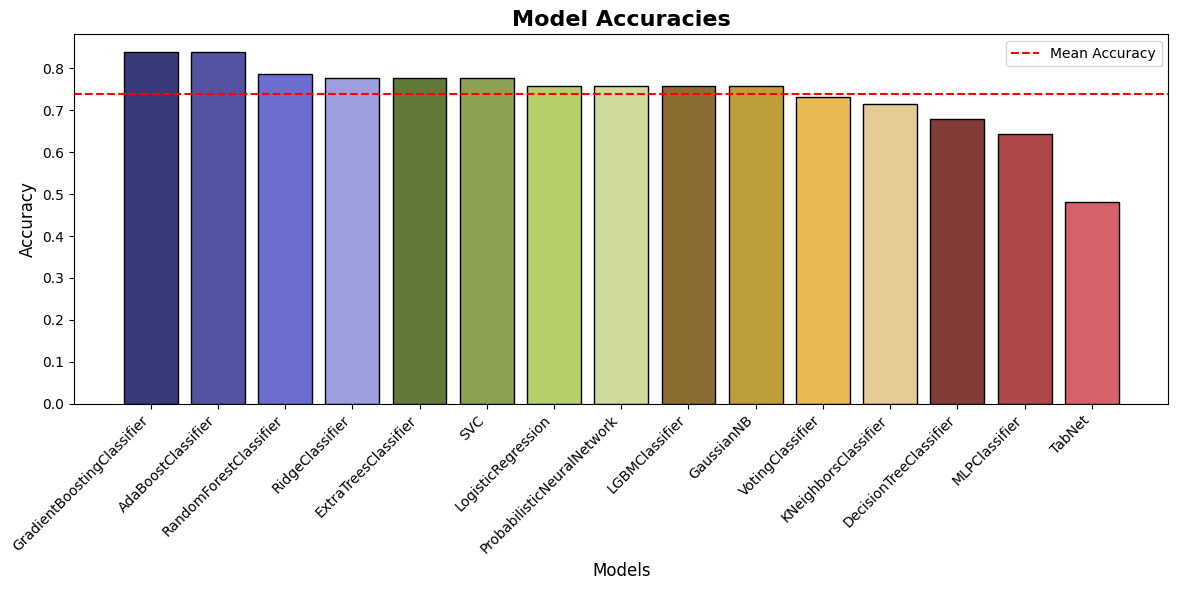

In [78]:
colors = plt.get_cmap("tab20b").colors

if len(models) > len(colors):
    colors = colors * (len(models) // len(colors)) + colors[: len(models) % len(colors)]

plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=colors, edgecolor="black")
plt.axhline(y=np.mean(accuracies), color="red", linestyle="--", label="Mean Accuracy")
plt.title("Model Accuracies", fontsize=16, fontweight="bold")
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

The resulting bar charts visualise the accuracy of various models, revealing distinct trends and disparities in performance. The accuracies range from 0.482 (TabNet) to 0.839 (GradientBoostingClassifier and AdaBoostClassifier), with the mean accuracy, indicated by a red dashed line, providing a benchmark for comparison. While most models cluster around similar accuracy levels, the markedly low performance of TabNet suggests potential issues such as suboptimal hyperparameters, inadequate compatibility with the dataset, or a poor fit for the problem domain. Conversely, the top-performing models (GradientBoostingClassifier and AdaBoostClassifier) demonstrate superior capability, standing out clearly above the mean.

However, models like MLPClassifier and DecisionTreeClassifier exhibit relatively low accuracy, raising questions about their suitability. The similarity in accuracy among certain models, such as RidgeClassifier, SVC, and ExtraTreesClassifier, highlights consistency in their performance but may also indicate redundancy. 

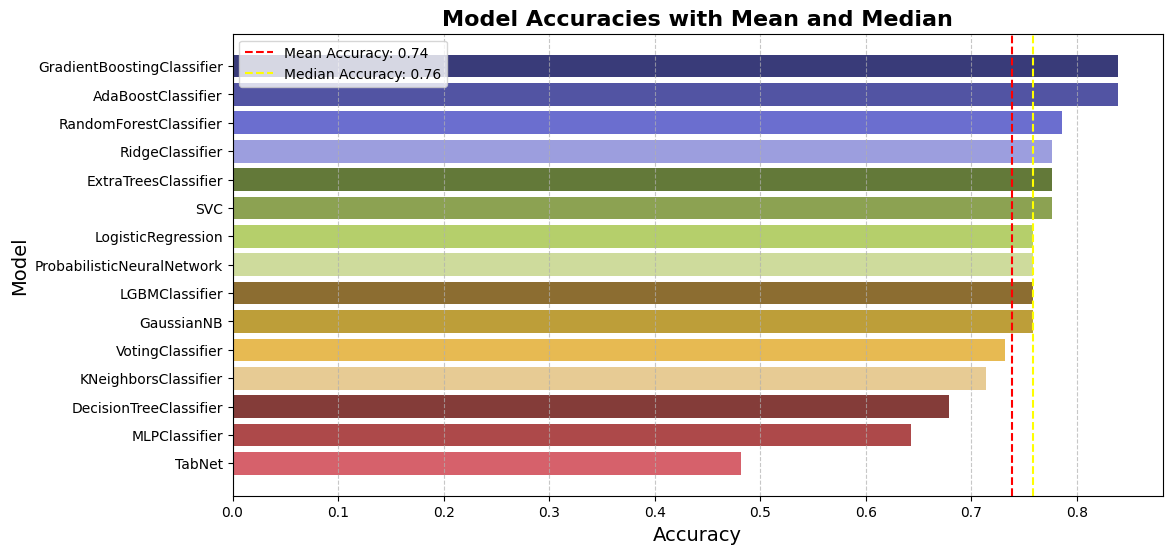

In [79]:
plt.figure(figsize=(12, 6))
plt.barh(models, accuracies, color=colors)
plt.axvline(
    mean_accuracy,
    color="red",
    linestyle="--",
    label=f"Mean Accuracy: {mean_accuracy:.2f}",
)
plt.axvline(
    median_accuracy,
    color="yellow",
    linestyle="--",
    label=f"Median Accuracy: {median_accuracy:.2f}",
)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.title("Model Accuracies with Mean and Median", fontsize=16, fontweight="bold")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

The use of percentiles—dividing the models into quartiles—effectively highlights variations in accuracy. The mean accuracy, indicated by the red dashed line, provides a useful benchmark, around which many models cluster. However, the clustering around the median accuracy suggests a relatively narrow spread among most models, aside from the clear outliers. The high overlap in accuracies for several models such as RidgeClassifier, ExtraTreesClassifier or SVC; around 0.77 might indicate comparable effectiveness, potentially warranting additional evaluation criteria to differentiate them meaningfully.

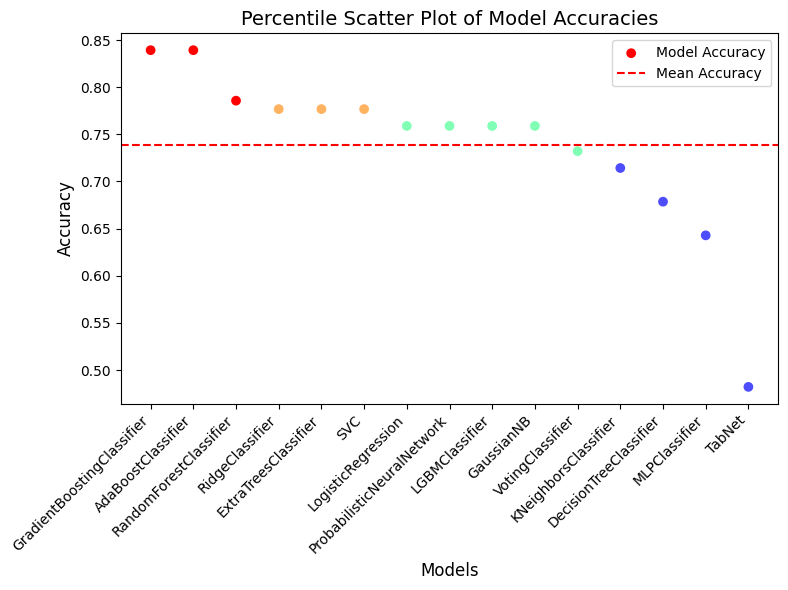

In [81]:
percentiles = np.percentile(accuracies, [25, 50, 75])
colors_percentile = sns.color_palette("rainbow", as_cmap=True)

colors_assigned = []
for accuracy in accuracies:
    if accuracy <= percentiles[0]:
        colors_assigned.append(colors_percentile(0.1))
    elif accuracy <= percentiles[1]:
        colors_assigned.append(colors_percentile(0.5))
    elif accuracy <= percentiles[2]:
        colors_assigned.append(colors_percentile(0.75))
    else:
        colors_assigned.append(colors_percentile(1.0))

plt.figure(figsize=(8, 6))
plt.scatter(models, accuracies, color=colors_assigned, label="Model Accuracy")
plt.axhline(y=np.mean(accuracies), color="red", linestyle="--", label="Mean Accuracy")
plt.title("Percentile Scatter Plot of Model Accuracies", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

The boxplot of model accuracies reveals key insights into the performance distribution across the evaluated models. The central tendency of the data, as indicated by the median line, suggests that most models perform moderately well, with a substantial concentration of accuracy values around the 0.75–0.78 range. However, TabNet, with an accuracy of 0.482, represents a distinct underperformance compared to the rest.

The interquartile range appears relatively narrow, highlighting limited variability among most models, except for the aforementioned outliers. This suggests a general consistency in model performance, yet the presence of clear leaders and laggards raises questions about the suitability of certain models for this specific dataset.

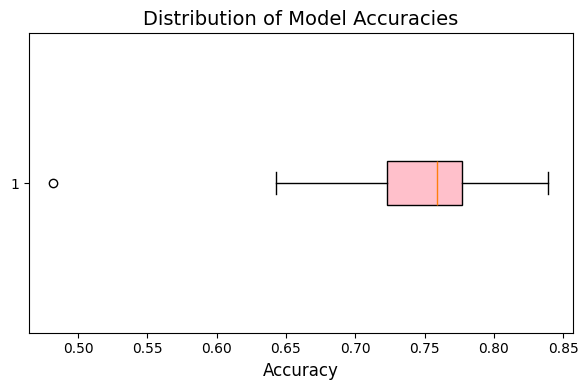

In [85]:
plt.figure(figsize=(6, 4))
plt.boxplot(
    accuracies,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="black"),
)
plt.title("Distribution of Model Accuracies", fontsize=14)
plt.xlabel("Accuracy", fontsize=12)
plt.tight_layout()
plt.show()

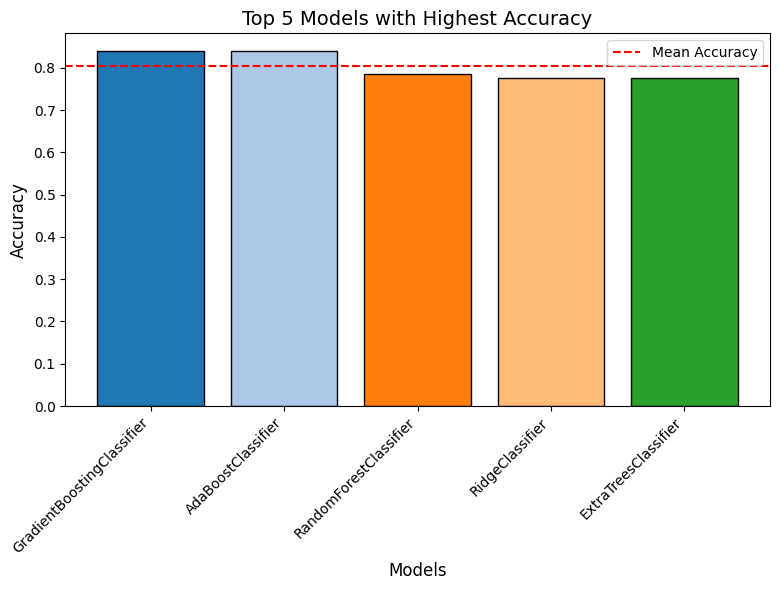

In [83]:
top_5_models = sorted_models[:5]

top_models, top_accuracies = zip(*top_5_models)

colors_top_5 = plt.get_cmap("tab20").colors

if len(top_models) > len(colors_top_5):
    colors_top_5 = (
        colors_top_5 * (len(top_models) // len(colors_top_5))
        + colors_top_5[: len(top_models) % len(colors_top_5)]
    )

plt.figure(figsize=(8, 6))
plt.bar(top_models, top_accuracies, color=colors_top_5, edgecolor="black")
plt.axhline(y=np.mean(top_accuracies), color="red", linestyle="--", label="Mean Accuracy")
plt.title("Top 5 Models with Highest Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()